# BASEBALL CASE STUDY

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:/Users/user/Desktop/DT Python/Data-Science-ML-Capstone-Projects-master/baseball.csv')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [3]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
df.tail()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [5]:
df.shape

(30, 17)

In [6]:
df.describe(include='all')

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [7]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


<AxesSubplot:>

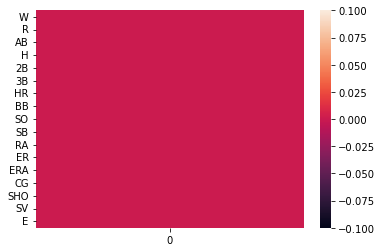

In [9]:
sns.heatmap(df.isnull().sum().to_frame())

16 different features to be plotted

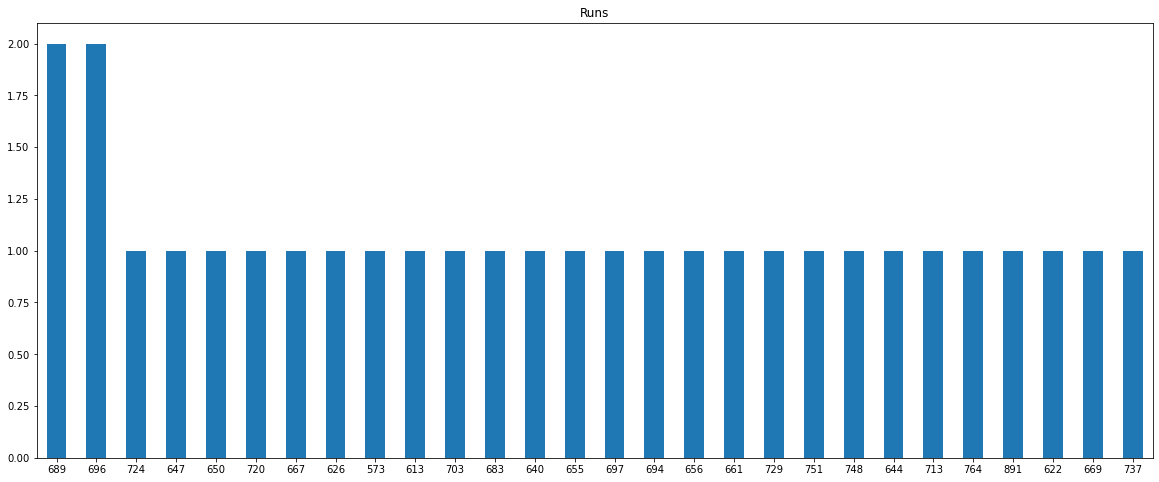

In [10]:
plt.subplot()
df['R'].value_counts().plot(kind='bar',title='Runs',figsize=(20,8))
plt.xticks(rotation=0)
plt.show()

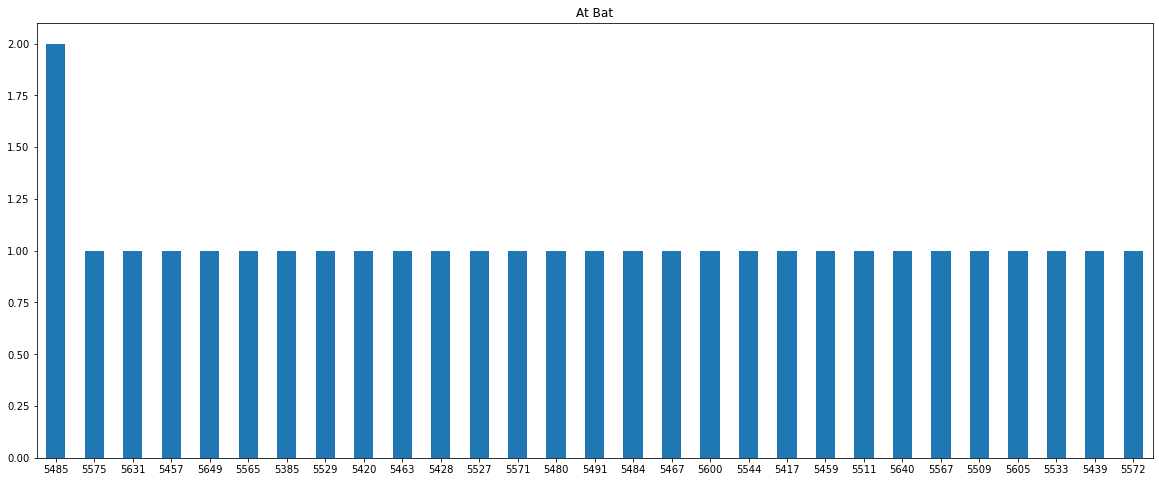

In [11]:
plt.subplot()
df['AB'].value_counts().plot(kind='bar',title='At Bat',figsize=(20,8))
plt.xticks(rotation=0)
plt.show()

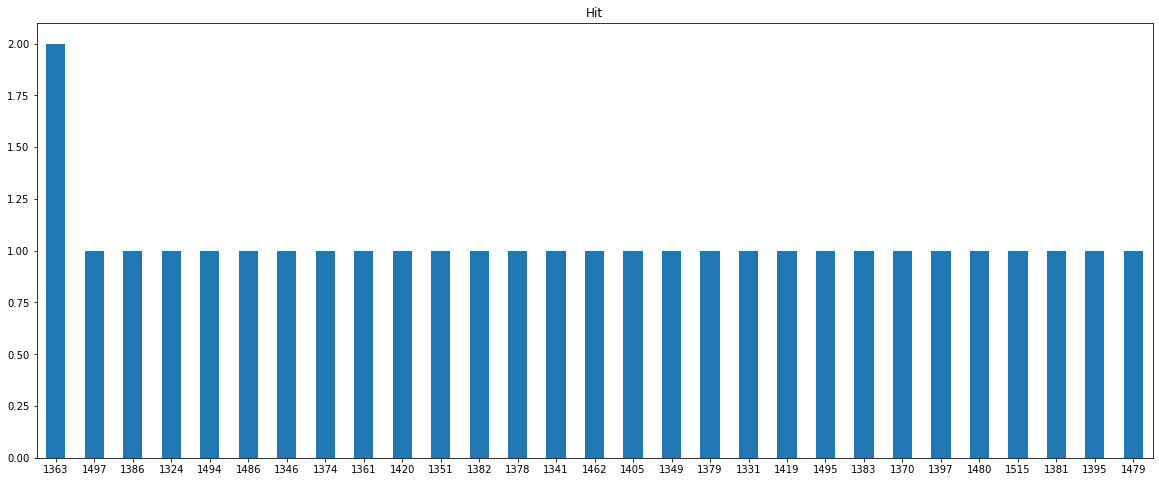

In [12]:
plt.subplot()
df['H'].value_counts().plot(kind='bar',title='Hit',figsize=(20,8))
plt.xticks(rotation=0)
plt.show()

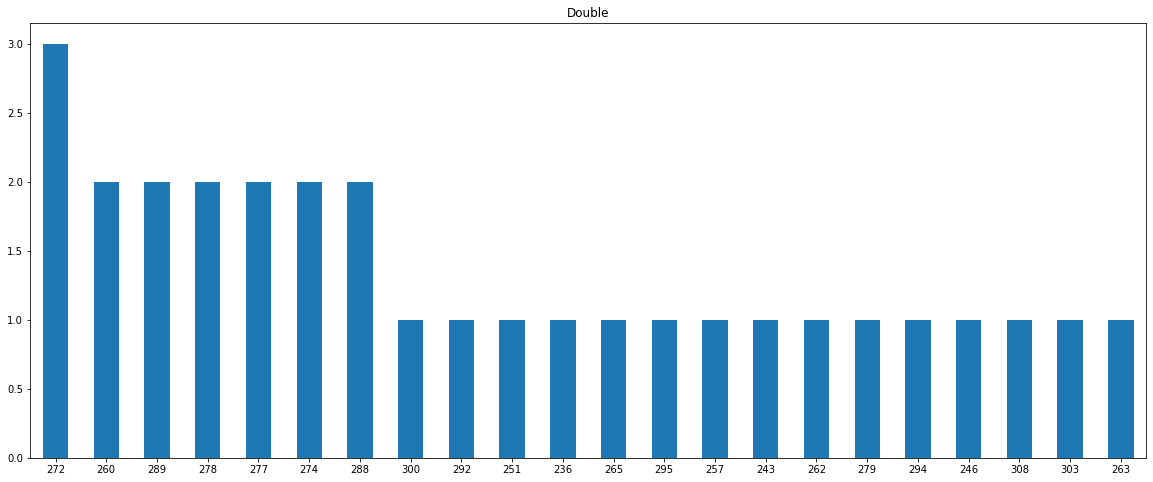

In [13]:
plt.subplot()
df['2B'].value_counts().plot(kind='bar',title='Double',figsize=(20,8))
plt.xticks(rotation=0)
plt.show()

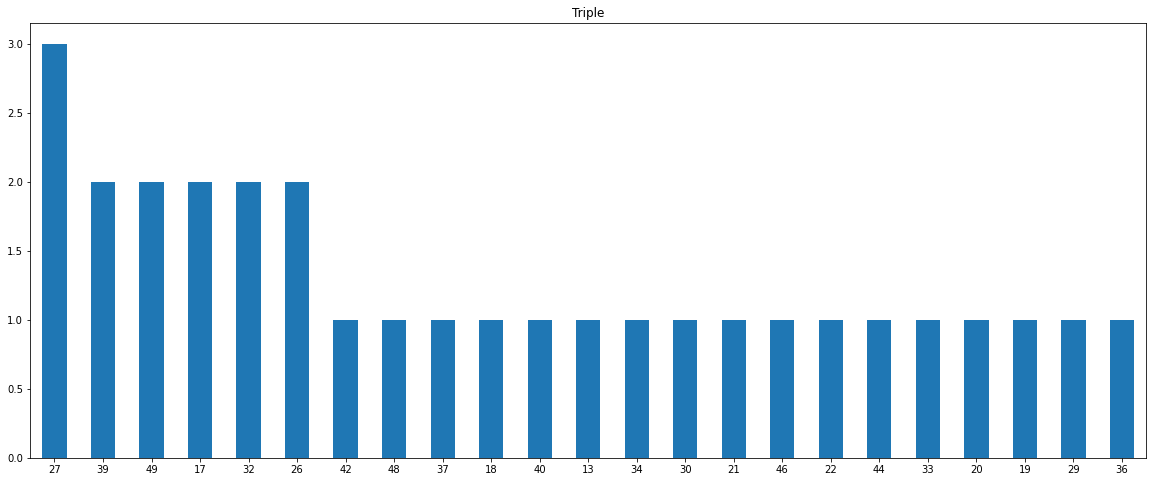

In [14]:
plt.subplot()
df['3B'].value_counts().plot(kind='bar',title='Triple',figsize=(20,8))
plt.xticks(rotation=0)
plt.show()

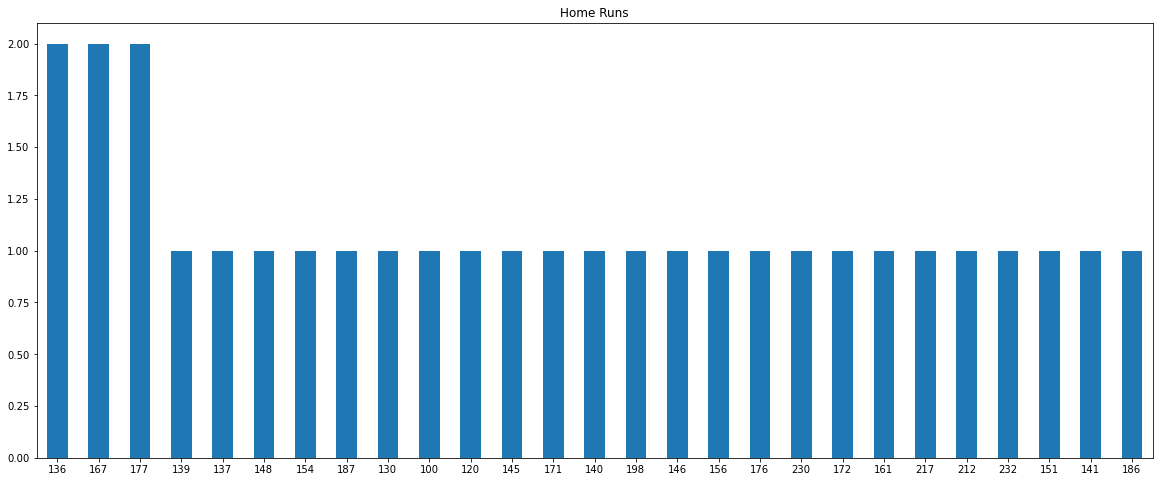

In [15]:
plt.subplot()
df['HR'].value_counts().plot(kind='bar',title='Home Runs',figsize=(20,8))
plt.xticks(rotation=0)
plt.show()

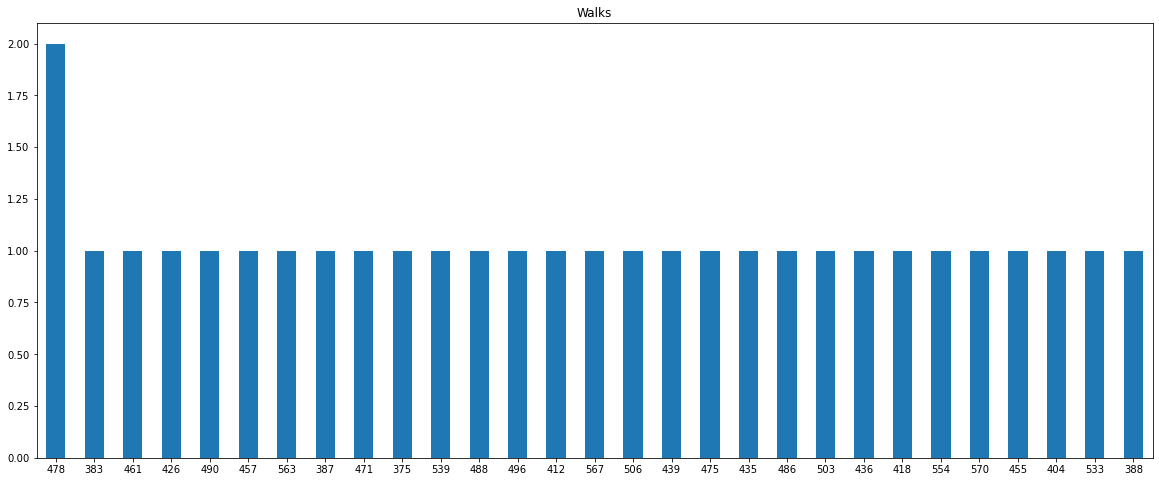

In [16]:
plt.subplot()
df['BB'].value_counts().plot(kind='bar',title='Walks',figsize=(20,8))
plt.xticks(rotation=0)
plt.show()

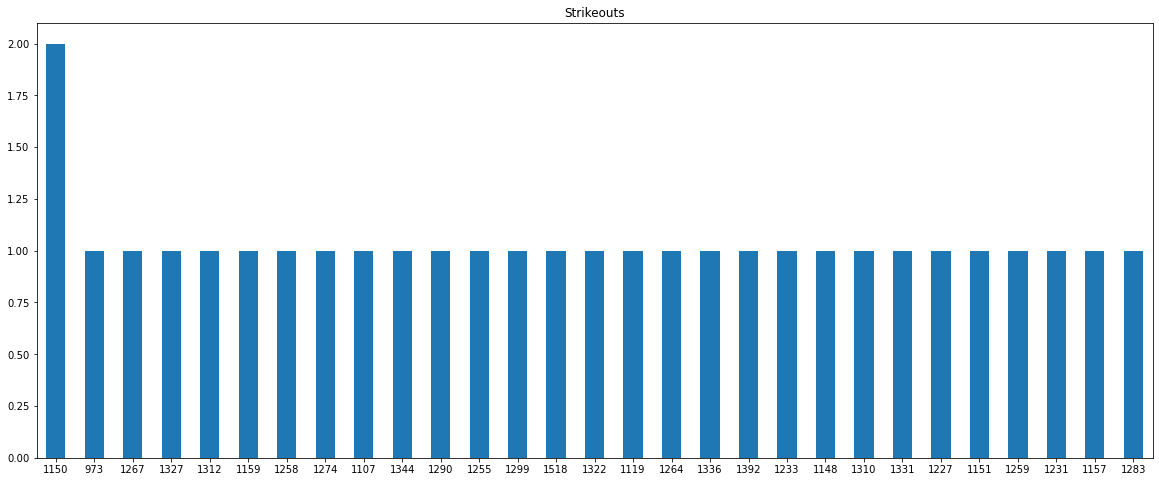

In [17]:
plt.subplot()
df['SO'].value_counts().plot(kind='bar',title='Strikeouts',figsize=(20,8))
plt.xticks(rotation=0)
plt.show()

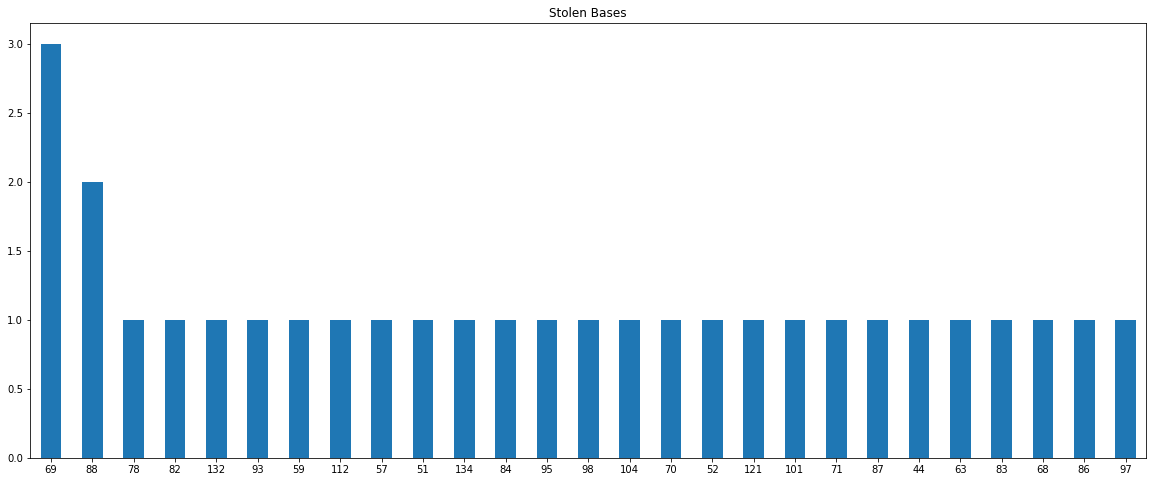

In [18]:
plt.subplot()
df['SB'].value_counts().plot(kind='bar',title='Stolen Bases',figsize=(20,8))
plt.xticks(rotation=0)
plt.show()

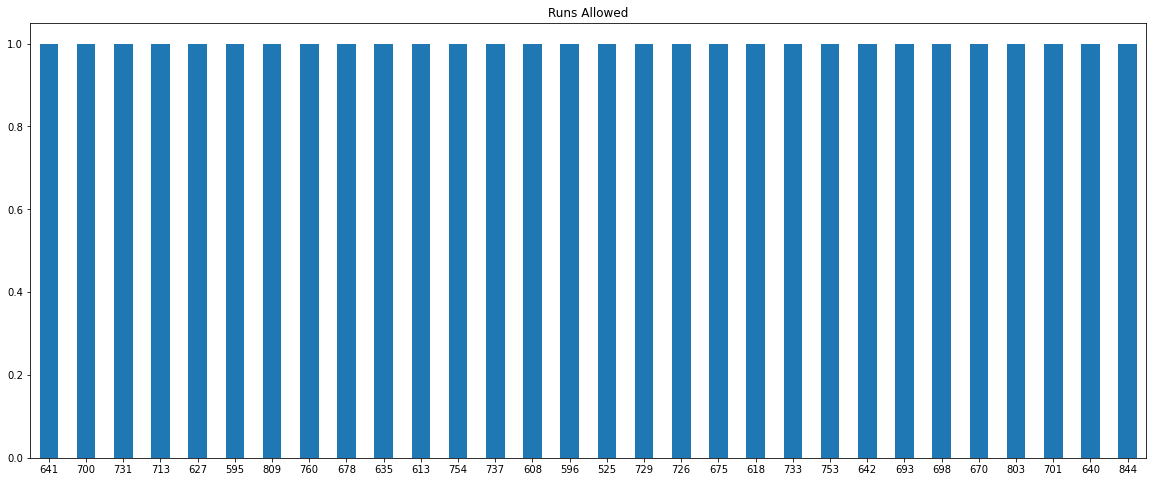

In [19]:
plt.subplot()
df['RA'].value_counts().plot(kind='bar',title='Runs Allowed',figsize=(20,8))
plt.xticks(rotation=0)
plt.show()

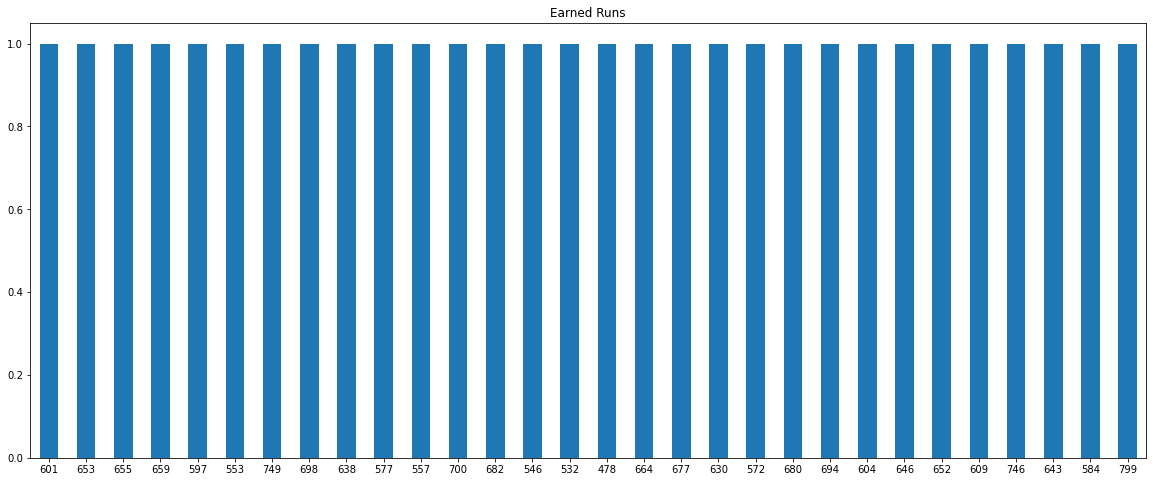

In [20]:
plt.subplot()
df['ER'].value_counts().plot(kind='bar',title='Earned Runs',figsize=(20,8))
plt.xticks(rotation=0)
plt.show()

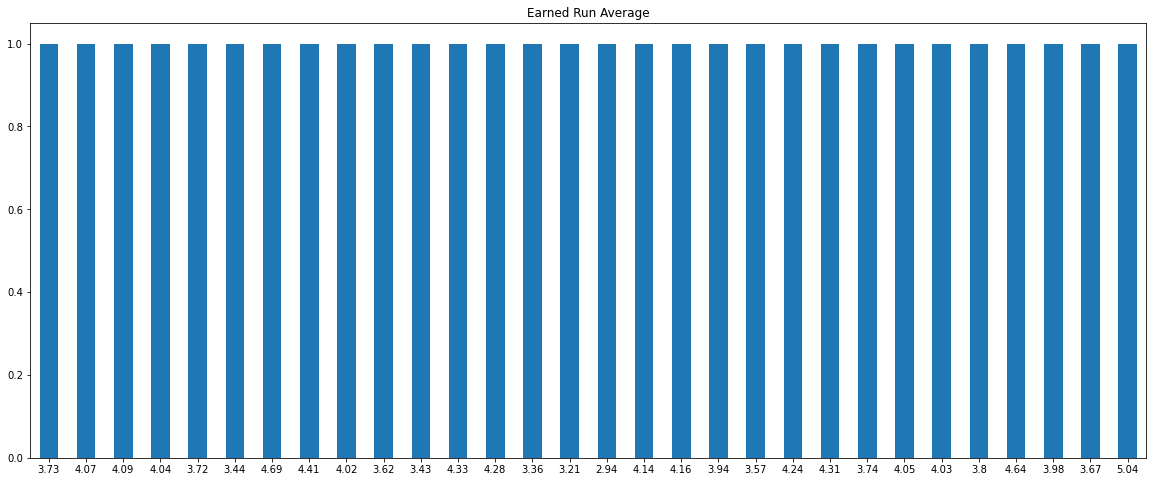

In [21]:
plt.subplot()
df['ERA'].value_counts().plot(kind='bar',title='Earned Run Average',figsize=(20,8))
plt.xticks(rotation=0)
plt.show()

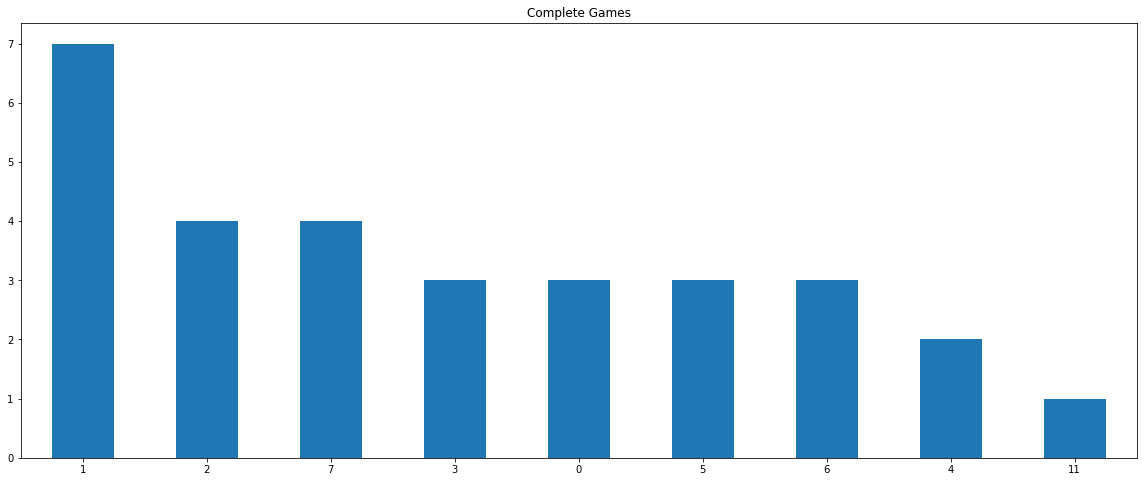

In [22]:
plt.subplot()
df['CG'].value_counts().plot(kind='bar',title='Complete Games',figsize=(20,8))
plt.xticks(rotation=0)
plt.show()

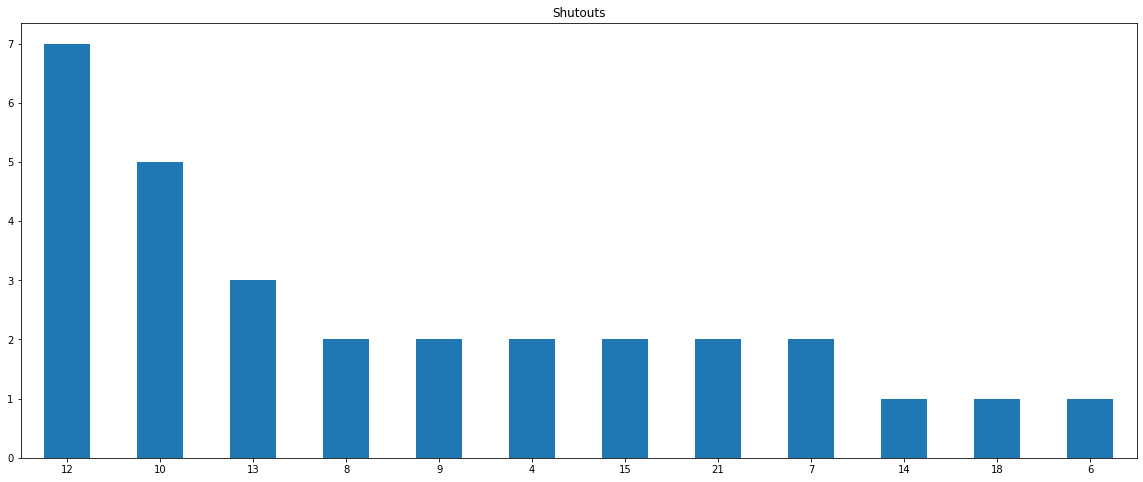

In [23]:
plt.subplot()
df['SHO'].value_counts().plot(kind='bar',title='Shutouts',figsize=(20,8))
plt.xticks(rotation=0)
plt.show()

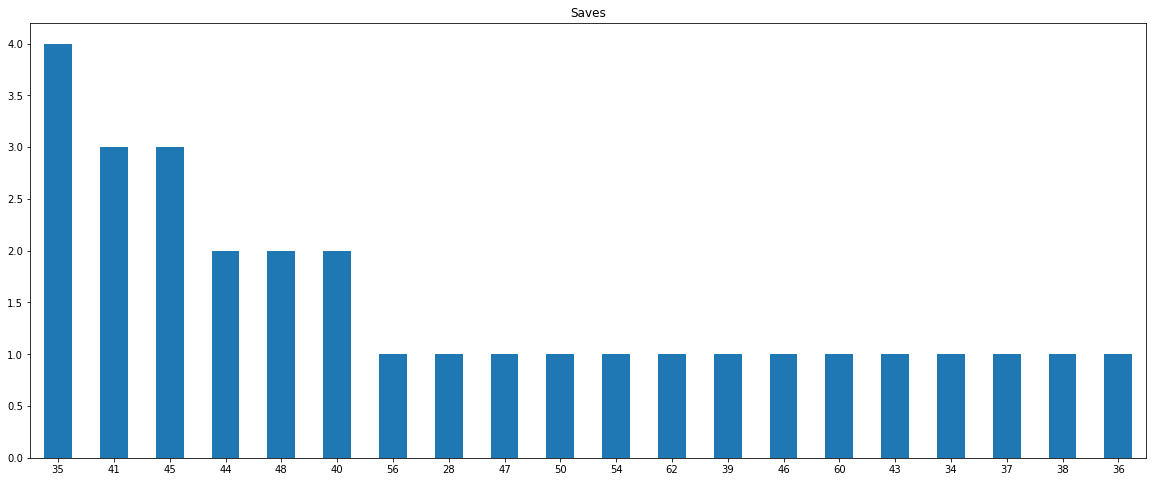

In [24]:
plt.subplot()
df['SV'].value_counts().plot(kind='bar',title='Saves',figsize=(20,8))
plt.xticks(rotation=0)
plt.show()

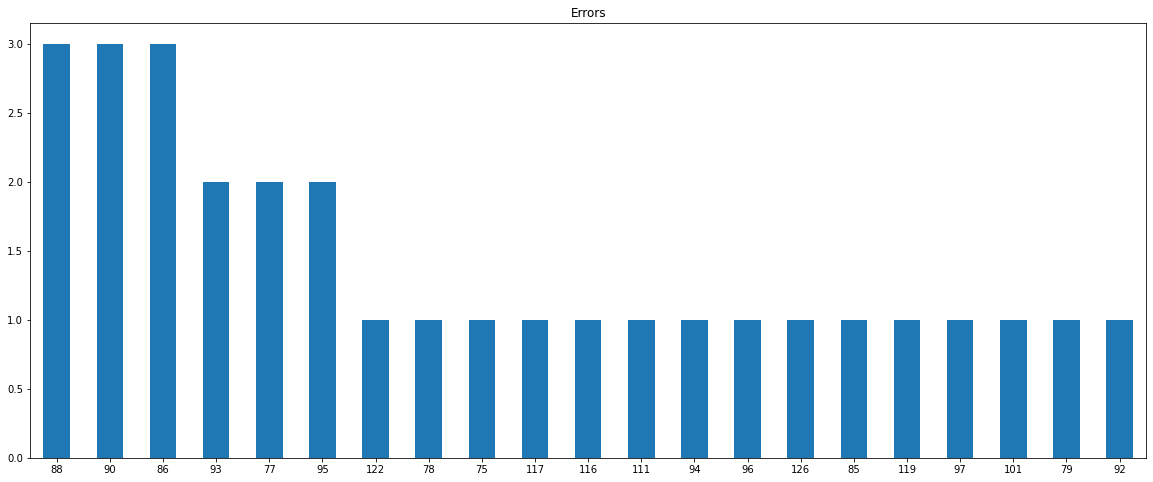

In [25]:
plt.subplot()
df['E'].value_counts().plot(kind='bar',title='Errors',figsize=(20,8))
plt.xticks(rotation=0)
plt.show()

<AxesSubplot:>

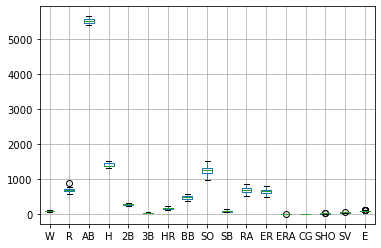

In [26]:
df.boxplot()

 Number of predicted wins(W)

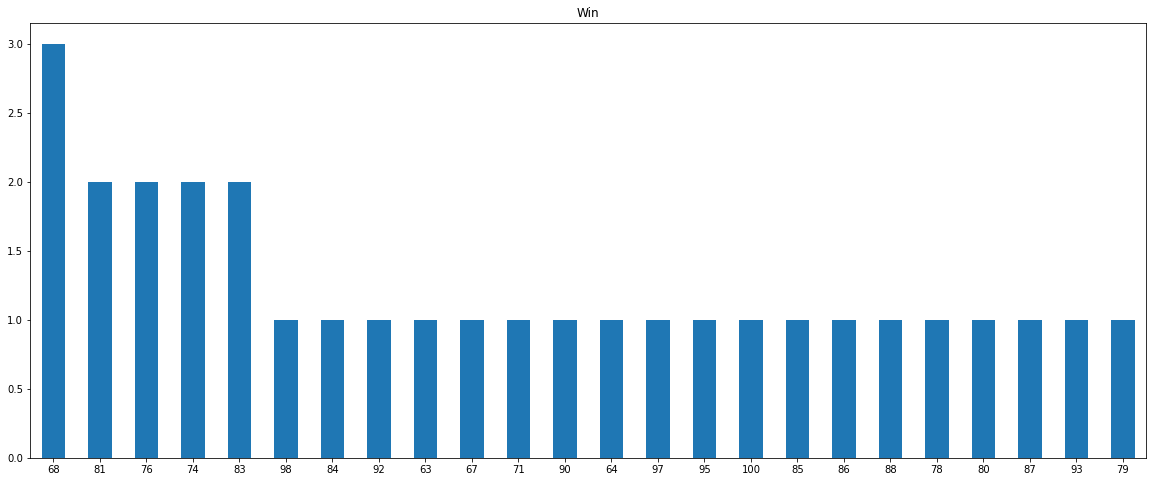

In [27]:
plt.subplot()
df['W'].value_counts().plot(kind='bar',title='Win',figsize=(20,8))
plt.xticks(rotation=0)
plt.show()

Distribution plot

<AxesSubplot:xlabel='W', ylabel='Density'>

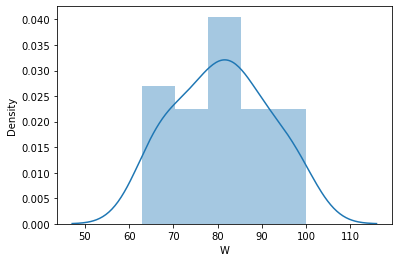

In [28]:
sns.distplot(df['W'])

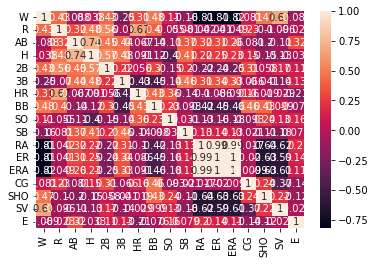

In [29]:
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.yticks(rotation=0)
plt.show()

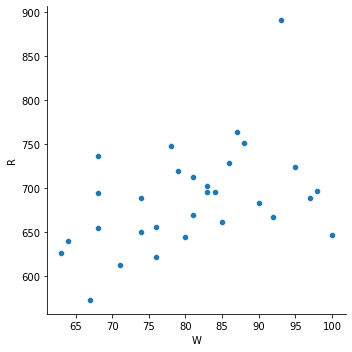

In [30]:
sns.relplot(x='W', y='R', data=df)

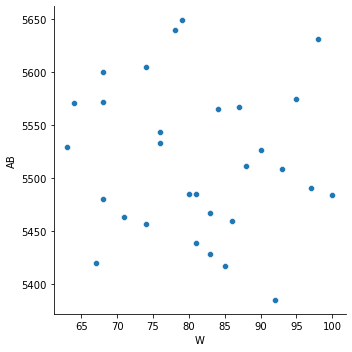

In [31]:
sns.relplot(x='W', y='AB', data=df)

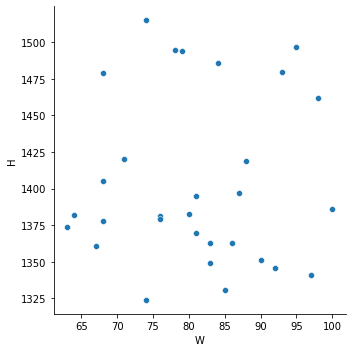

In [32]:
sns.relplot(x='W', y='H', data=df)

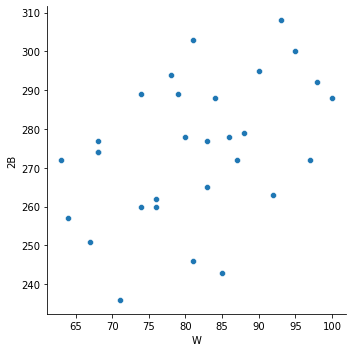

In [33]:
sns.relplot(x='W', y='2B', data=df)

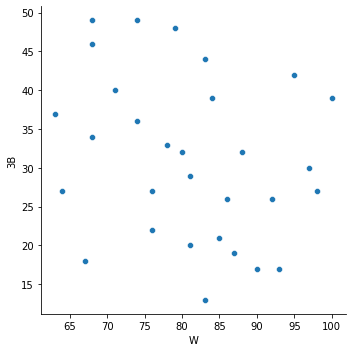

In [34]:
sns.relplot(x='W', y='3B', data=df)

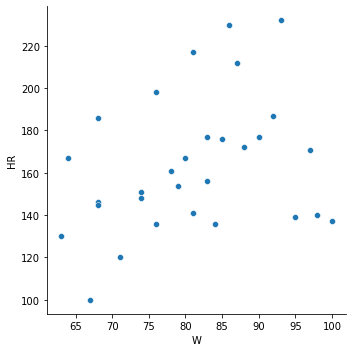

In [35]:
sns.relplot(x='W', y='HR', data=df)

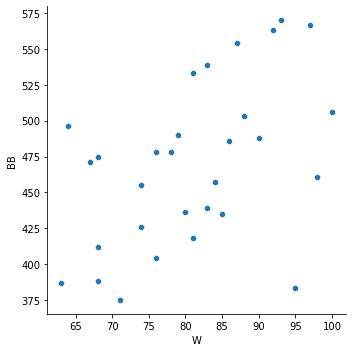

In [36]:
sns.relplot(x='W', y='BB', data=df)

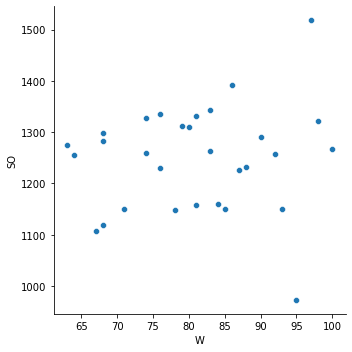

In [37]:
sns.relplot(x='W', y='SO', data=df)

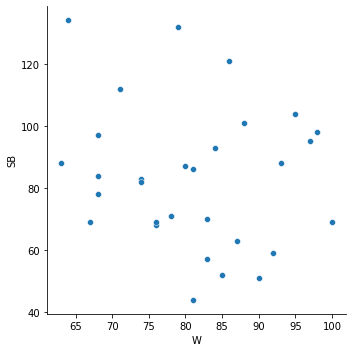

In [38]:
sns.relplot(x='W', y='SB', data=df)

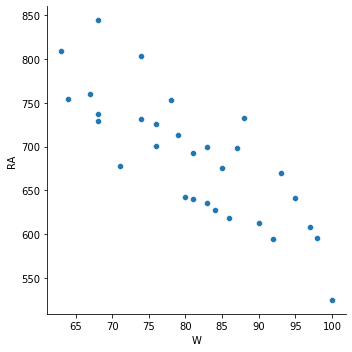

In [39]:
sns.relplot(x='W', y='RA', data=df)

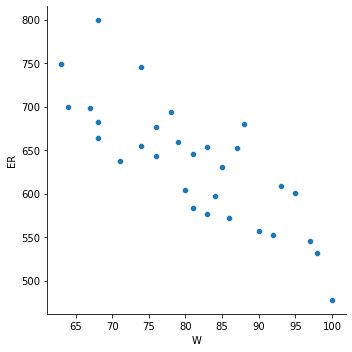

In [40]:
sns.relplot(x='W', y='ER', data=df)

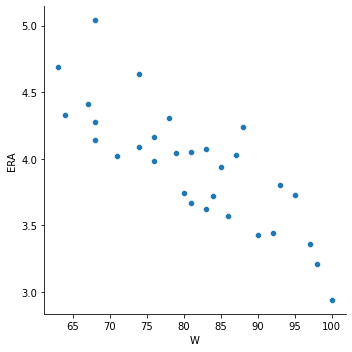

In [41]:
sns.relplot(x='W', y='ERA', data=df)

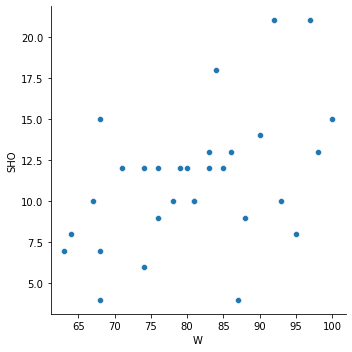

In [42]:
sns.relplot(x='W', y='SHO', data=df)

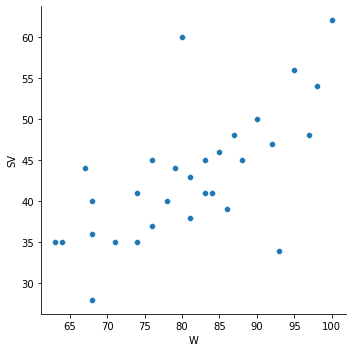

In [43]:
sns.relplot(x='W', y='SV', data=df)

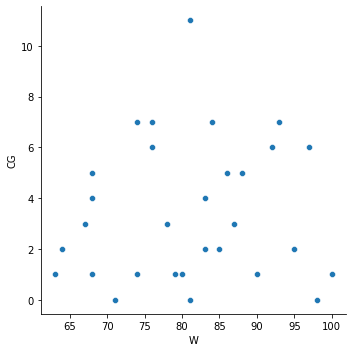

In [44]:
sns.relplot(x='W', y='CG', data=df)

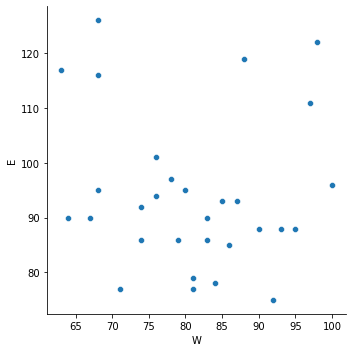

In [45]:
sns.relplot(x='W', y='E', data=df)

<AxesSubplot:>

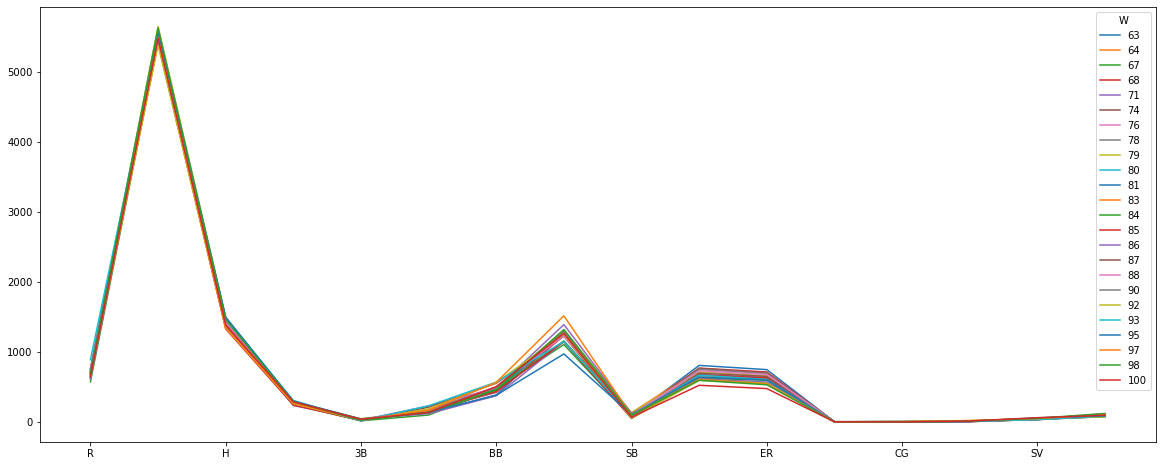

In [46]:
df.groupby('W')[['R','AB','H','2B','3B','HR','BB','SO','SB','RA','ER','ERA','CG','SHO','SV','E']].mean().T.plot(figsize=(20,8))

<AxesSubplot:>

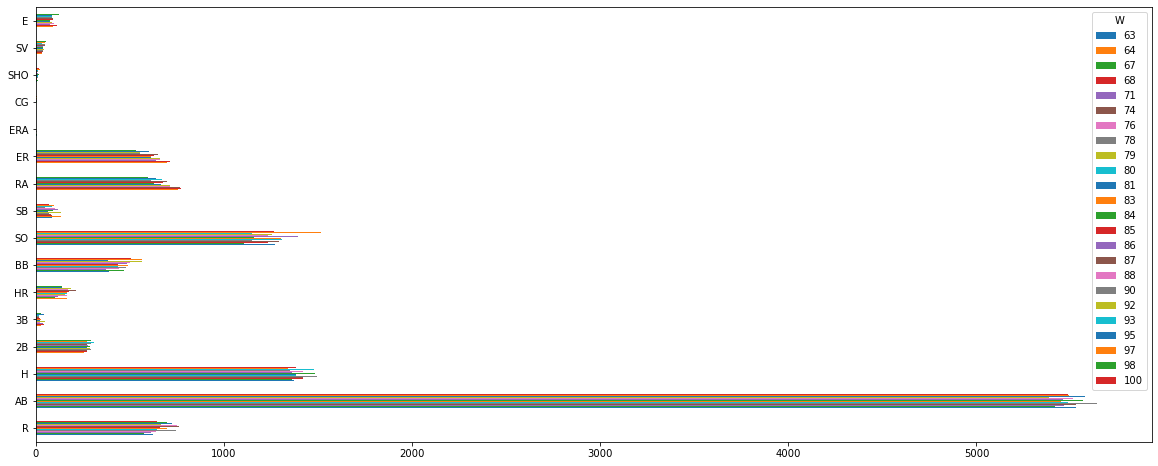

In [47]:
df.groupby('W')[['R','AB','H','2B','3B','HR','BB','SO','SB','RA','ER','ERA','CG','SHO','SV','E']].mean().T.plot(kind='barh',figsize=(20,8))

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [49]:
df.isna().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [50]:
df.shape

(30, 17)

In [51]:
df.isna().sum()/df.shape[0]*100

W      0.0
R      0.0
AB     0.0
H      0.0
2B     0.0
3B     0.0
HR     0.0
BB     0.0
SO     0.0
SB     0.0
RA     0.0
ER     0.0
ERA    0.0
CG     0.0
SHO    0.0
SV     0.0
E      0.0
dtype: float64

<AxesSubplot:xlabel='W'>

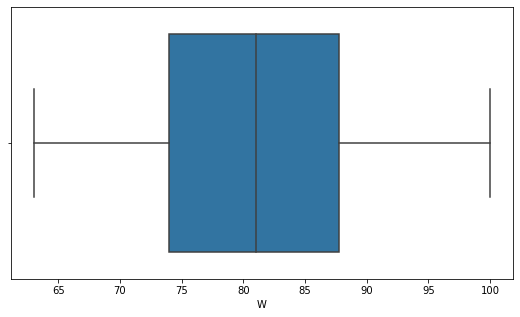

In [52]:
plt.figure(figsize=(9,5))
sns.boxplot('W',data=df)

In [53]:
df['W'].value_counts()

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64

In [54]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


<AxesSubplot:xlabel='W', ylabel='count'>

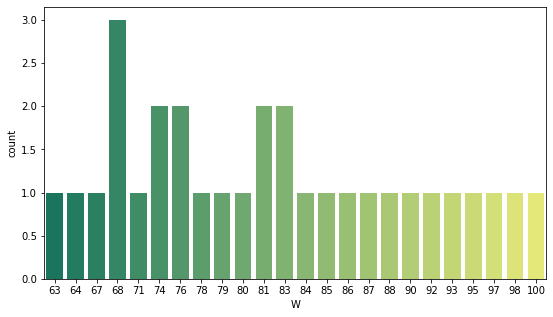

In [55]:
plt.figure(figsize=(9,5))
sns.countplot('W',data=df,palette='summer')

<AxesSubplot:xlabel='R', ylabel='count'>

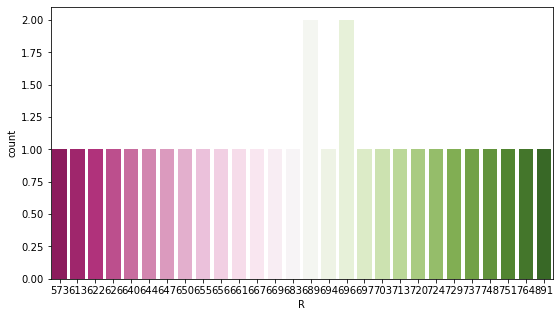

In [56]:
plt.figure(figsize=(9,5))
sns.countplot('R',data=df,palette='PiYG')

<AxesSubplot:xlabel='AB', ylabel='count'>

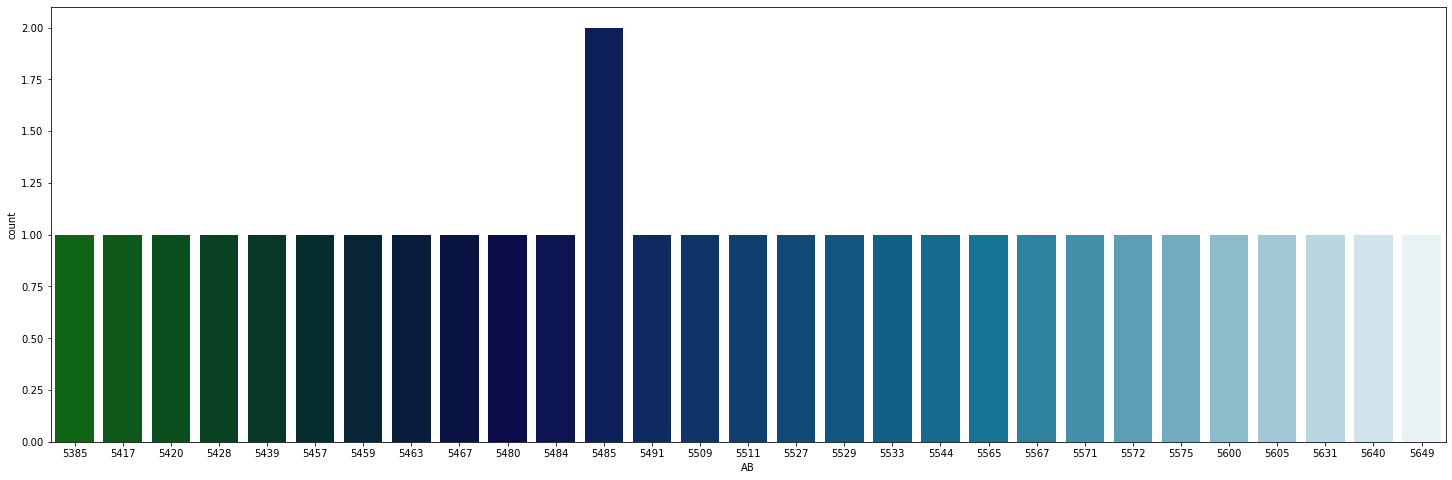

In [57]:
plt.figure(figsize=(25,8))
sns.countplot('AB',data=df,palette='ocean')

<AxesSubplot:xlabel='H', ylabel='count'>

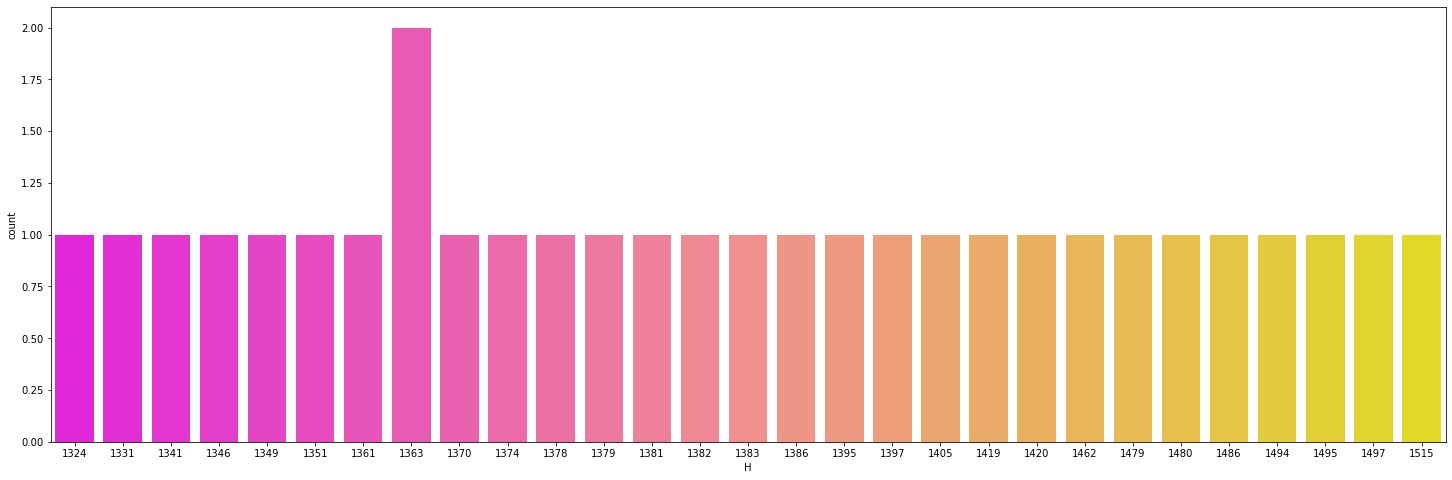

In [58]:
plt.figure(figsize=(25,8))
sns.countplot('H',data=df,palette='spring')

<AxesSubplot:xlabel='2B', ylabel='count'>

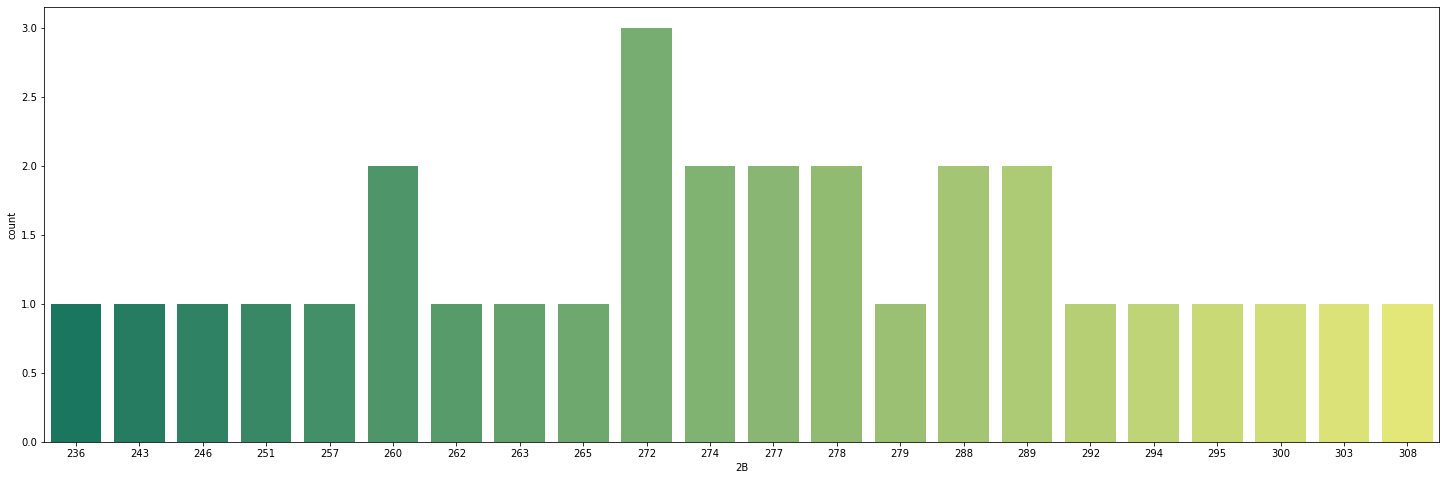

In [59]:
plt.figure(figsize=(25,8))
sns.countplot('2B',data=df,palette='summer')

<AxesSubplot:xlabel='3B', ylabel='count'>

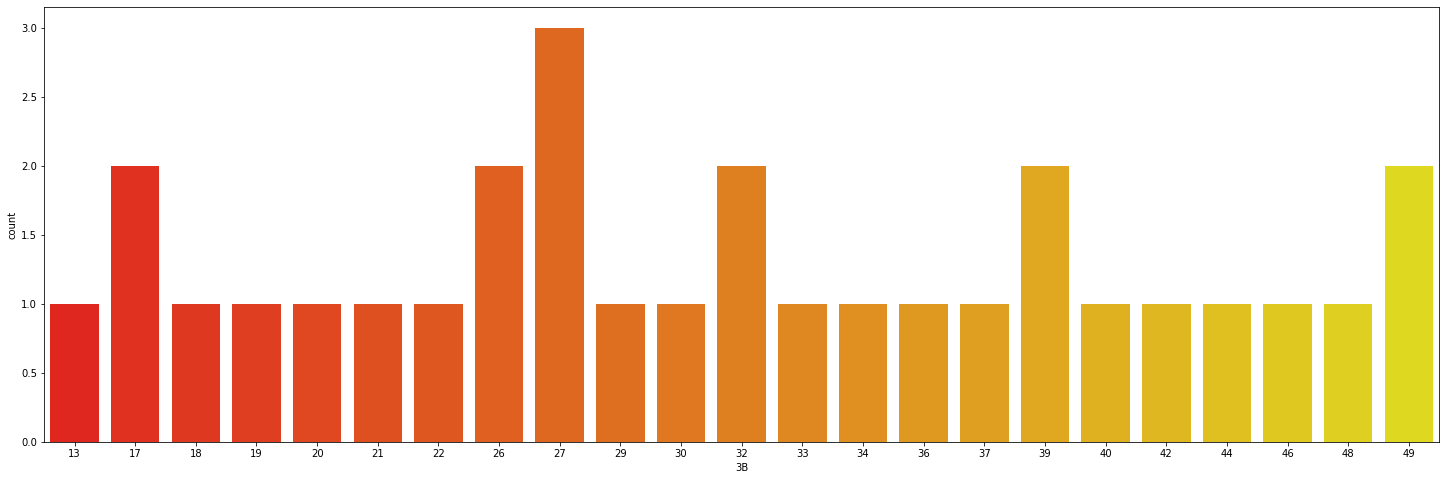

In [60]:
plt.figure(figsize=(25,8))
sns.countplot('3B',data=df,palette='autumn')

<AxesSubplot:xlabel='HR', ylabel='count'>

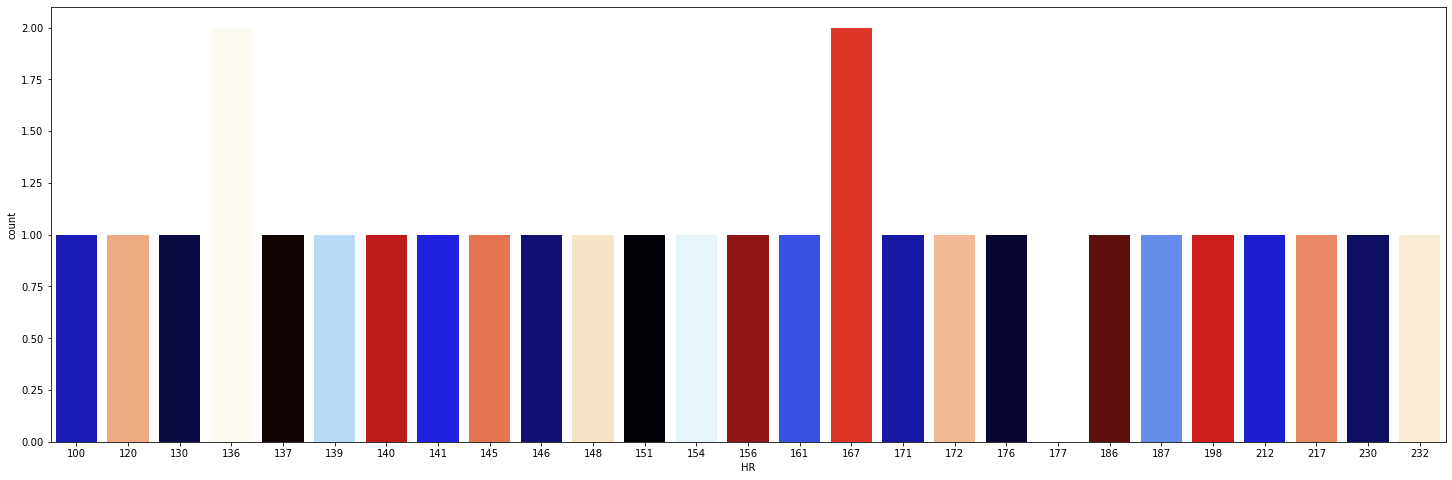

In [61]:
plt.figure(figsize=(25,8))
sns.countplot('HR',data=df,palette='flag')

<AxesSubplot:xlabel='BB', ylabel='count'>

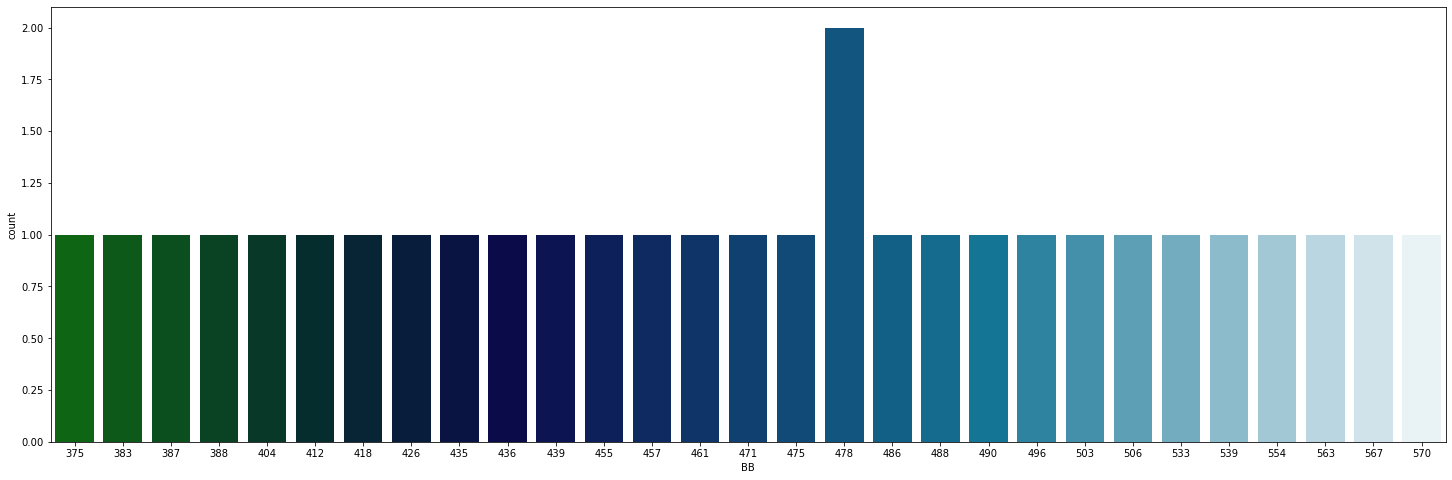

In [62]:
plt.figure(figsize=(25,8))
sns.countplot('BB',data=df,palette='ocean')

<AxesSubplot:xlabel='SO', ylabel='count'>

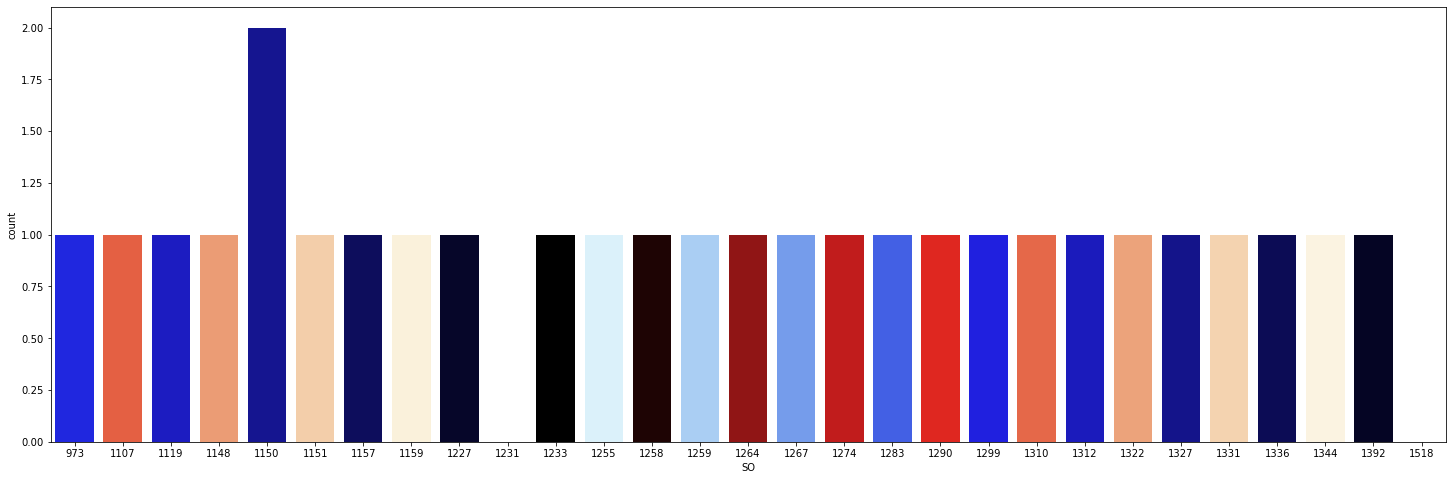

In [63]:
plt.figure(figsize=(25,8))
sns.countplot('SO',data=df,palette='flag')

<AxesSubplot:xlabel='SB', ylabel='count'>

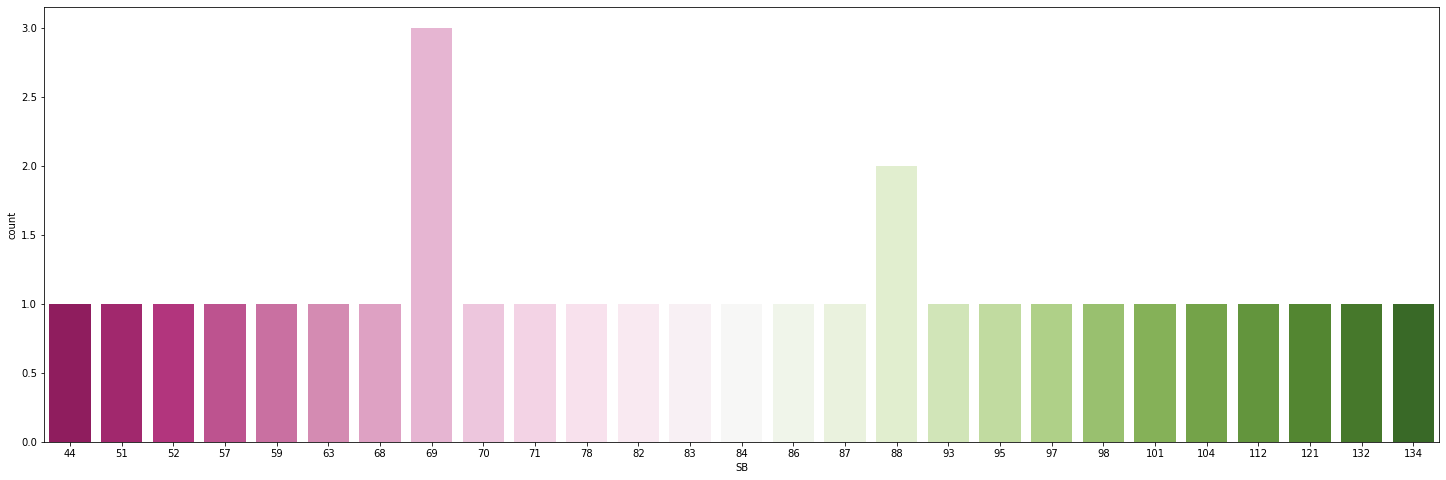

In [64]:
plt.figure(figsize=(25,8))
sns.countplot('SB',data=df,palette='PiYG')

<AxesSubplot:xlabel='RA', ylabel='count'>

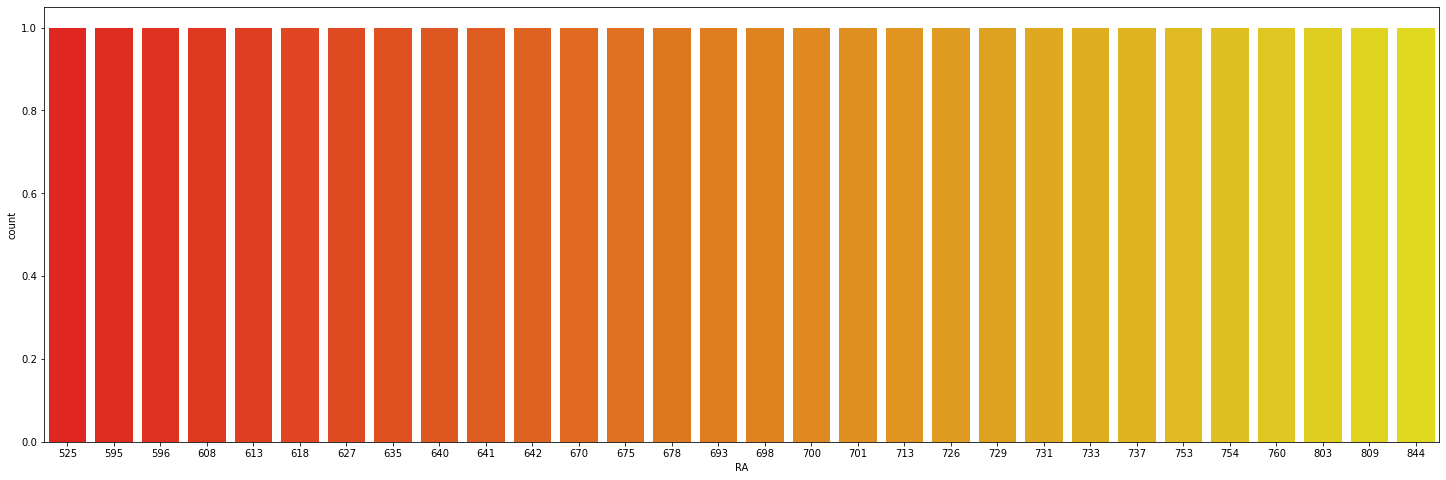

In [65]:
plt.figure(figsize=(25,8))
sns.countplot('RA',data=df,palette='autumn')

<AxesSubplot:xlabel='ER', ylabel='count'>

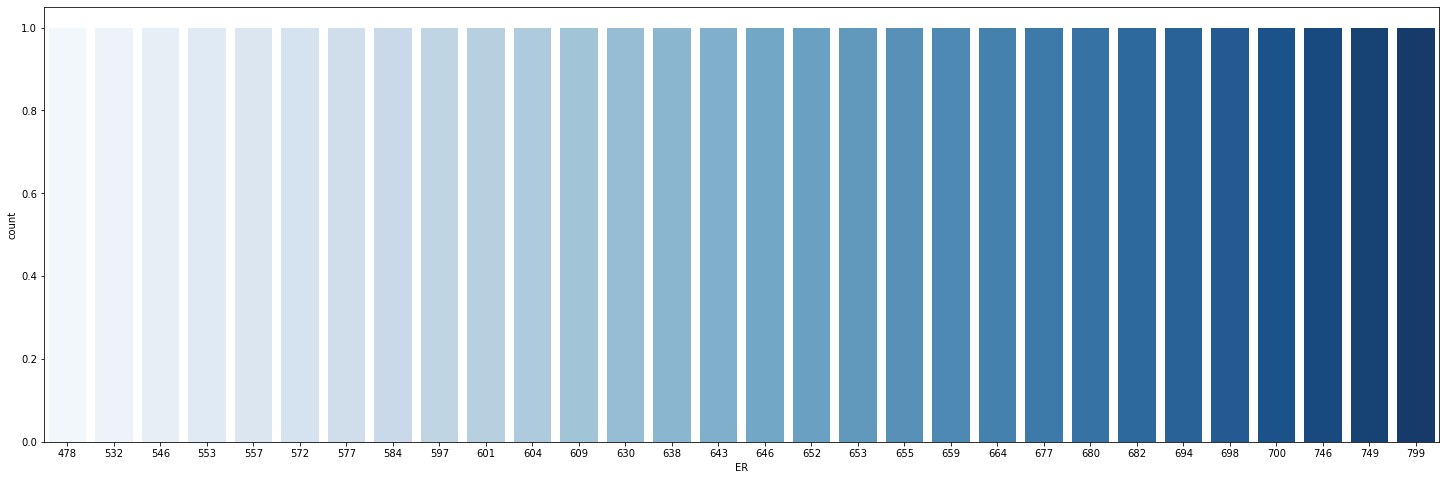

In [66]:
plt.figure(figsize=(25,8))
sns.countplot('ER',data=df,palette='Blues')

<AxesSubplot:xlabel='ERA', ylabel='count'>

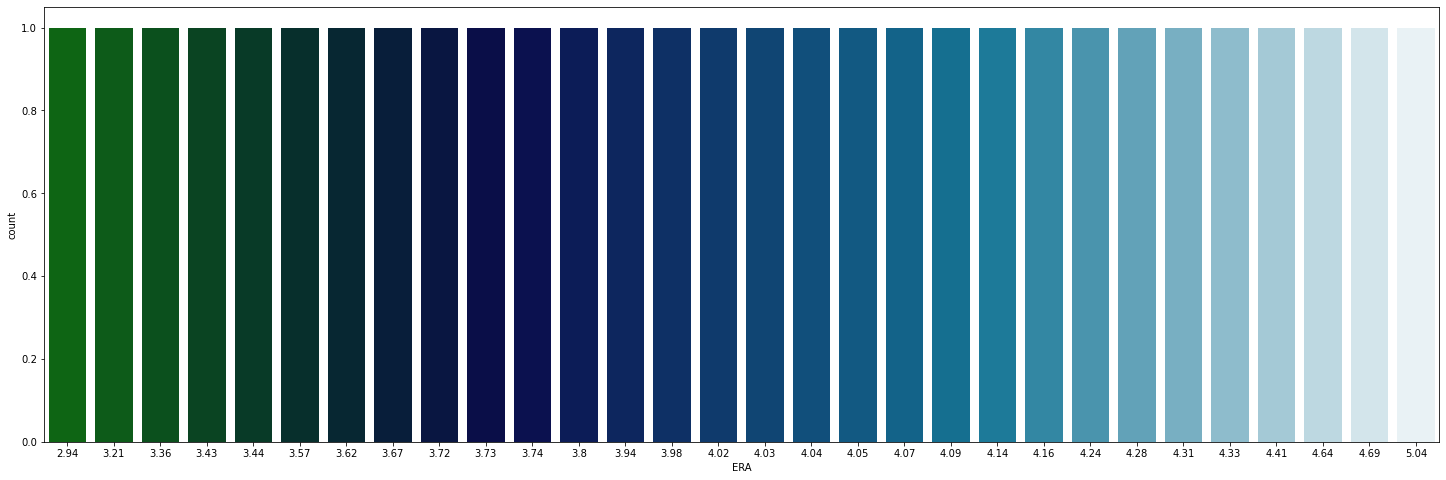

In [67]:
plt.figure(figsize=(25,8))
sns.countplot('ERA',data=df,palette='ocean')

<AxesSubplot:xlabel='CG', ylabel='count'>

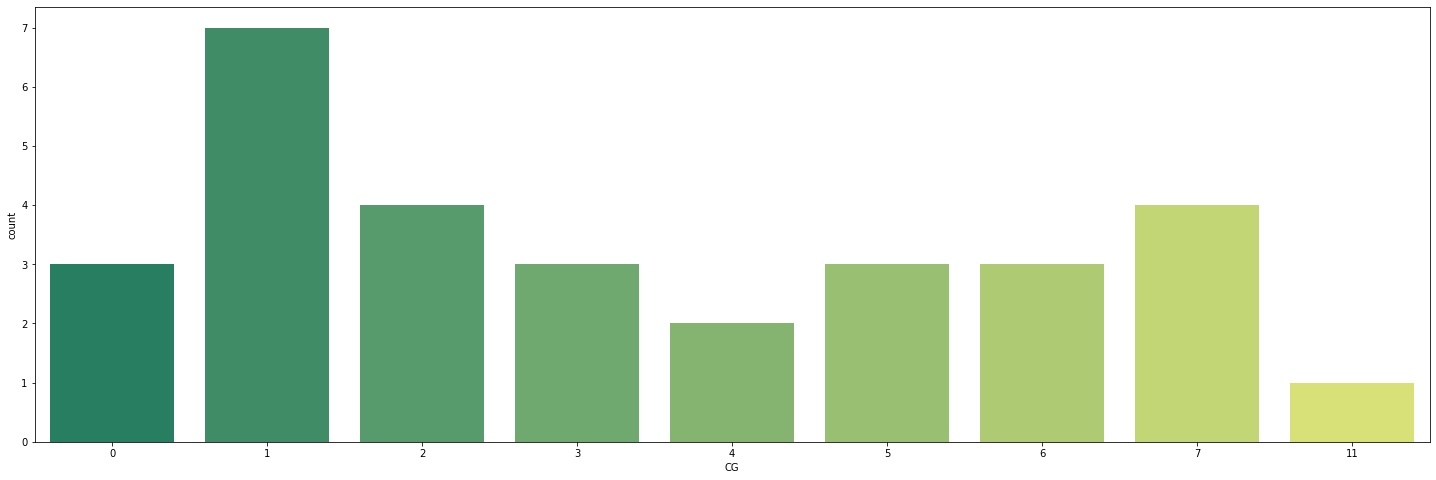

In [68]:
plt.figure(figsize=(25,8))
sns.countplot('CG',data=df,palette='summer')

<AxesSubplot:xlabel='SHO', ylabel='count'>

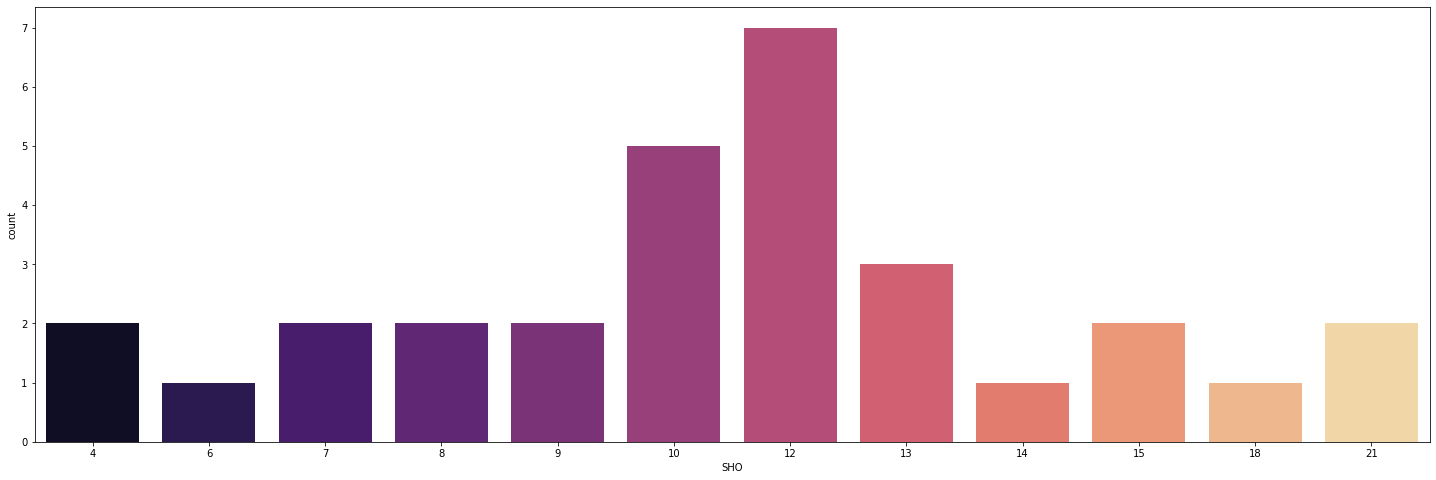

In [69]:
plt.figure(figsize=(25,8))
sns.countplot('SHO',data=df,palette='magma')

<AxesSubplot:xlabel='SV', ylabel='count'>

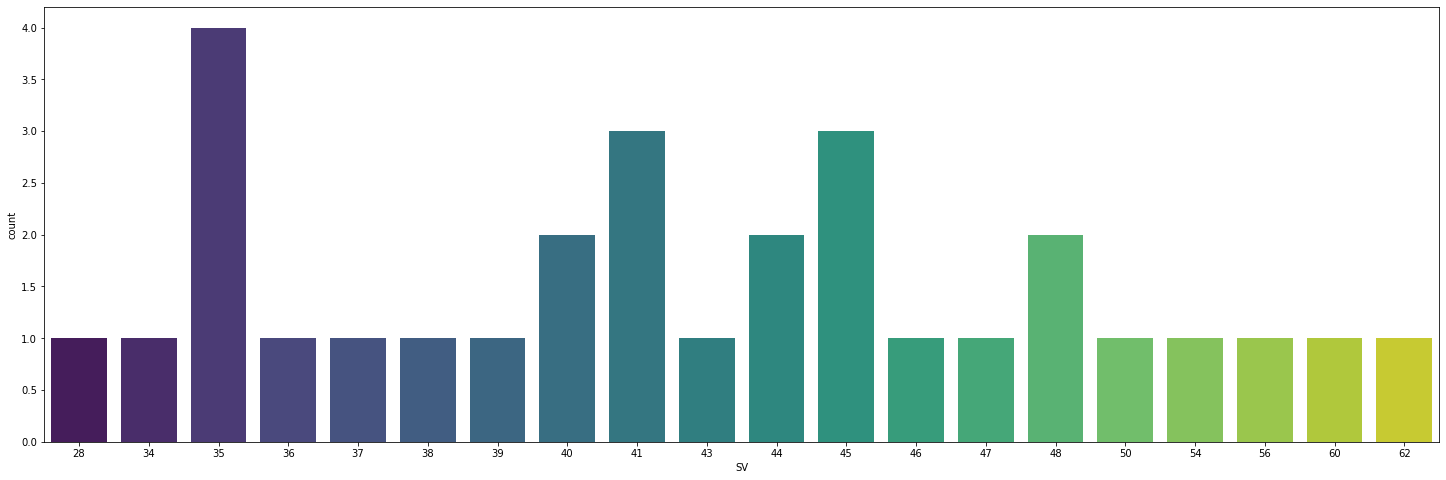

In [70]:
plt.figure(figsize=(25,8))
sns.countplot('SV',data=df,palette='viridis')

<AxesSubplot:xlabel='E', ylabel='count'>

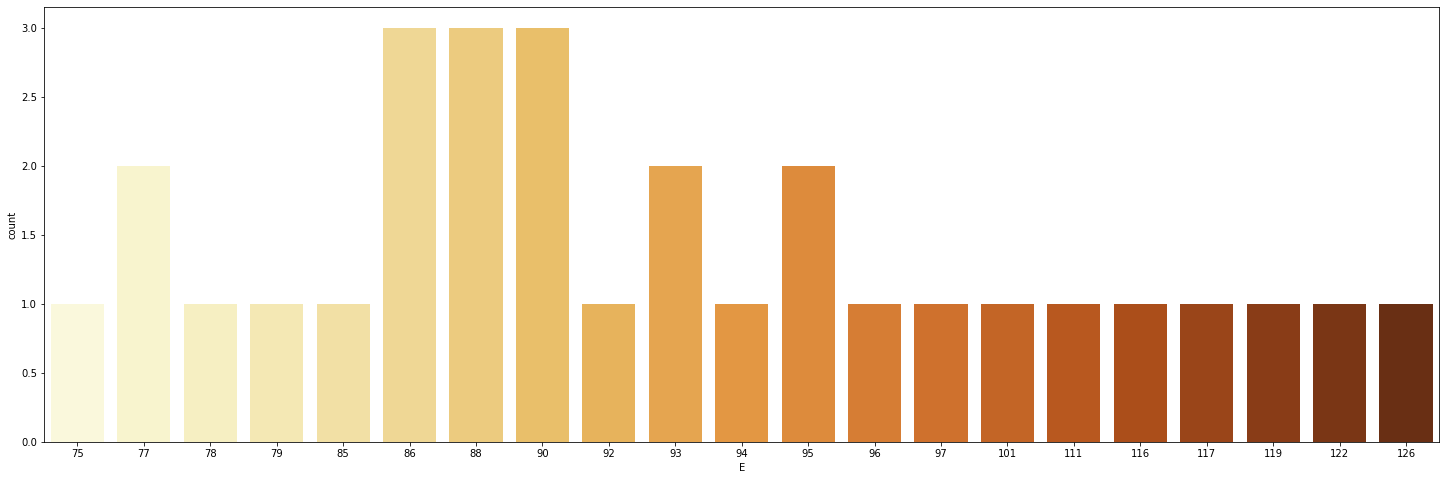

In [71]:
plt.figure(figsize=(25,8))
sns.countplot('E',data=df,palette='YlOrBr')

<AxesSubplot:>

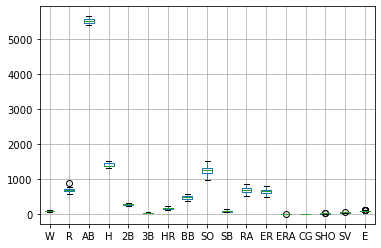

In [72]:
df.boxplot()

# BUILDING A MODEL

In [73]:
corr=df.corr()

In [74]:
corr

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


In [75]:
le = LabelEncoder()
var_mode = df.select_dtypes(include='object').columns

for i in var_mode:
    df[i] = le.fit_transform(df[i])
     

In [76]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [77]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [78]:
df.iterrows

<bound method DataFrame.iterrows of       W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  \
0    95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2   
1    83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   
2    81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   
3    76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7   
4    74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   
5    93  891  5509  1480  308  17  232  570  1151   88  670  609  3.80   7   
6    87  764  5567  1397  272  19  212  554  1227   63  698  652  4.03   3   
7    81  713  5485  1370  246  20  217  418  1331   44  693  646  4.05   0   
8    80  644  5485  1383  278  32  167  436  1310   87  642  604  3.74   1   
9    78  748  5640  1495  294  33  161  478  1148   71  753  694  4.31   3   
10   88  751  5511  1419  279  32  172  503  1233  101  733  680  4.24   5   
11   86  729  5459  1363  27

In [79]:
x=df.drop(columns=['W'],axis=1)
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [80]:
y=df['W']

In [81]:
y

0      95
1      83
2      81
3      76
4      74
5      93
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

In [82]:
x_train,x_valid,y_train,y_valid=train_test_split(x,y,test_size=0.2,random_state=22)

In [83]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [84]:
algos=[LinearRegression(), Ridge(), Lasso(), DecisionTreeRegressor(), KNeighborsRegressor()]
names = ['Linear Regression' , 'Ridge Regression' , 'Lasso Regression' , 'K Neighbors Regression' , 'Decision Tree Regression']
rmse_list = []

In [85]:
for name in algos:
    model = name
    model.fit(x_train,y_train)
    y_pred = model.predict(x_valid)
    MSE = metrics.mean_squared_error(y_valid,y_pred)
    rmse = np.sqrt(MSE)
    rmse_list.append(rmse)

In [86]:
evaluation=pd.DataFrame({'Model':names,'RMSE':rmse_list})
evaluation

,Model,RMSE
0,Linear Regression,8.983364
1,Ridge Regression,3.972740
2,Lasso Regression,3.388710
3,K Neighbors Regression,9.389711
4,Decision Tree Regression,8.654093


<AxesSubplot:>

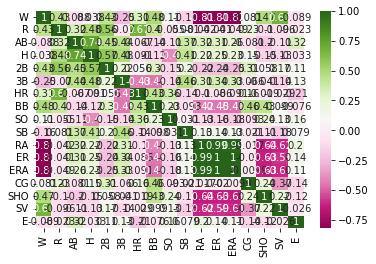

In [87]:
sns.heatmap(df.corr(), annot=True, cmap='PiYG')

In [88]:
from scipy import stats
df_z=pd.DataFrame()
num=df
z=np.abs(stats.zscore(df_z[num]))
a=int(df_z.size)
df_z = df_z[(z>3).all(axis=1)]

In [89]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

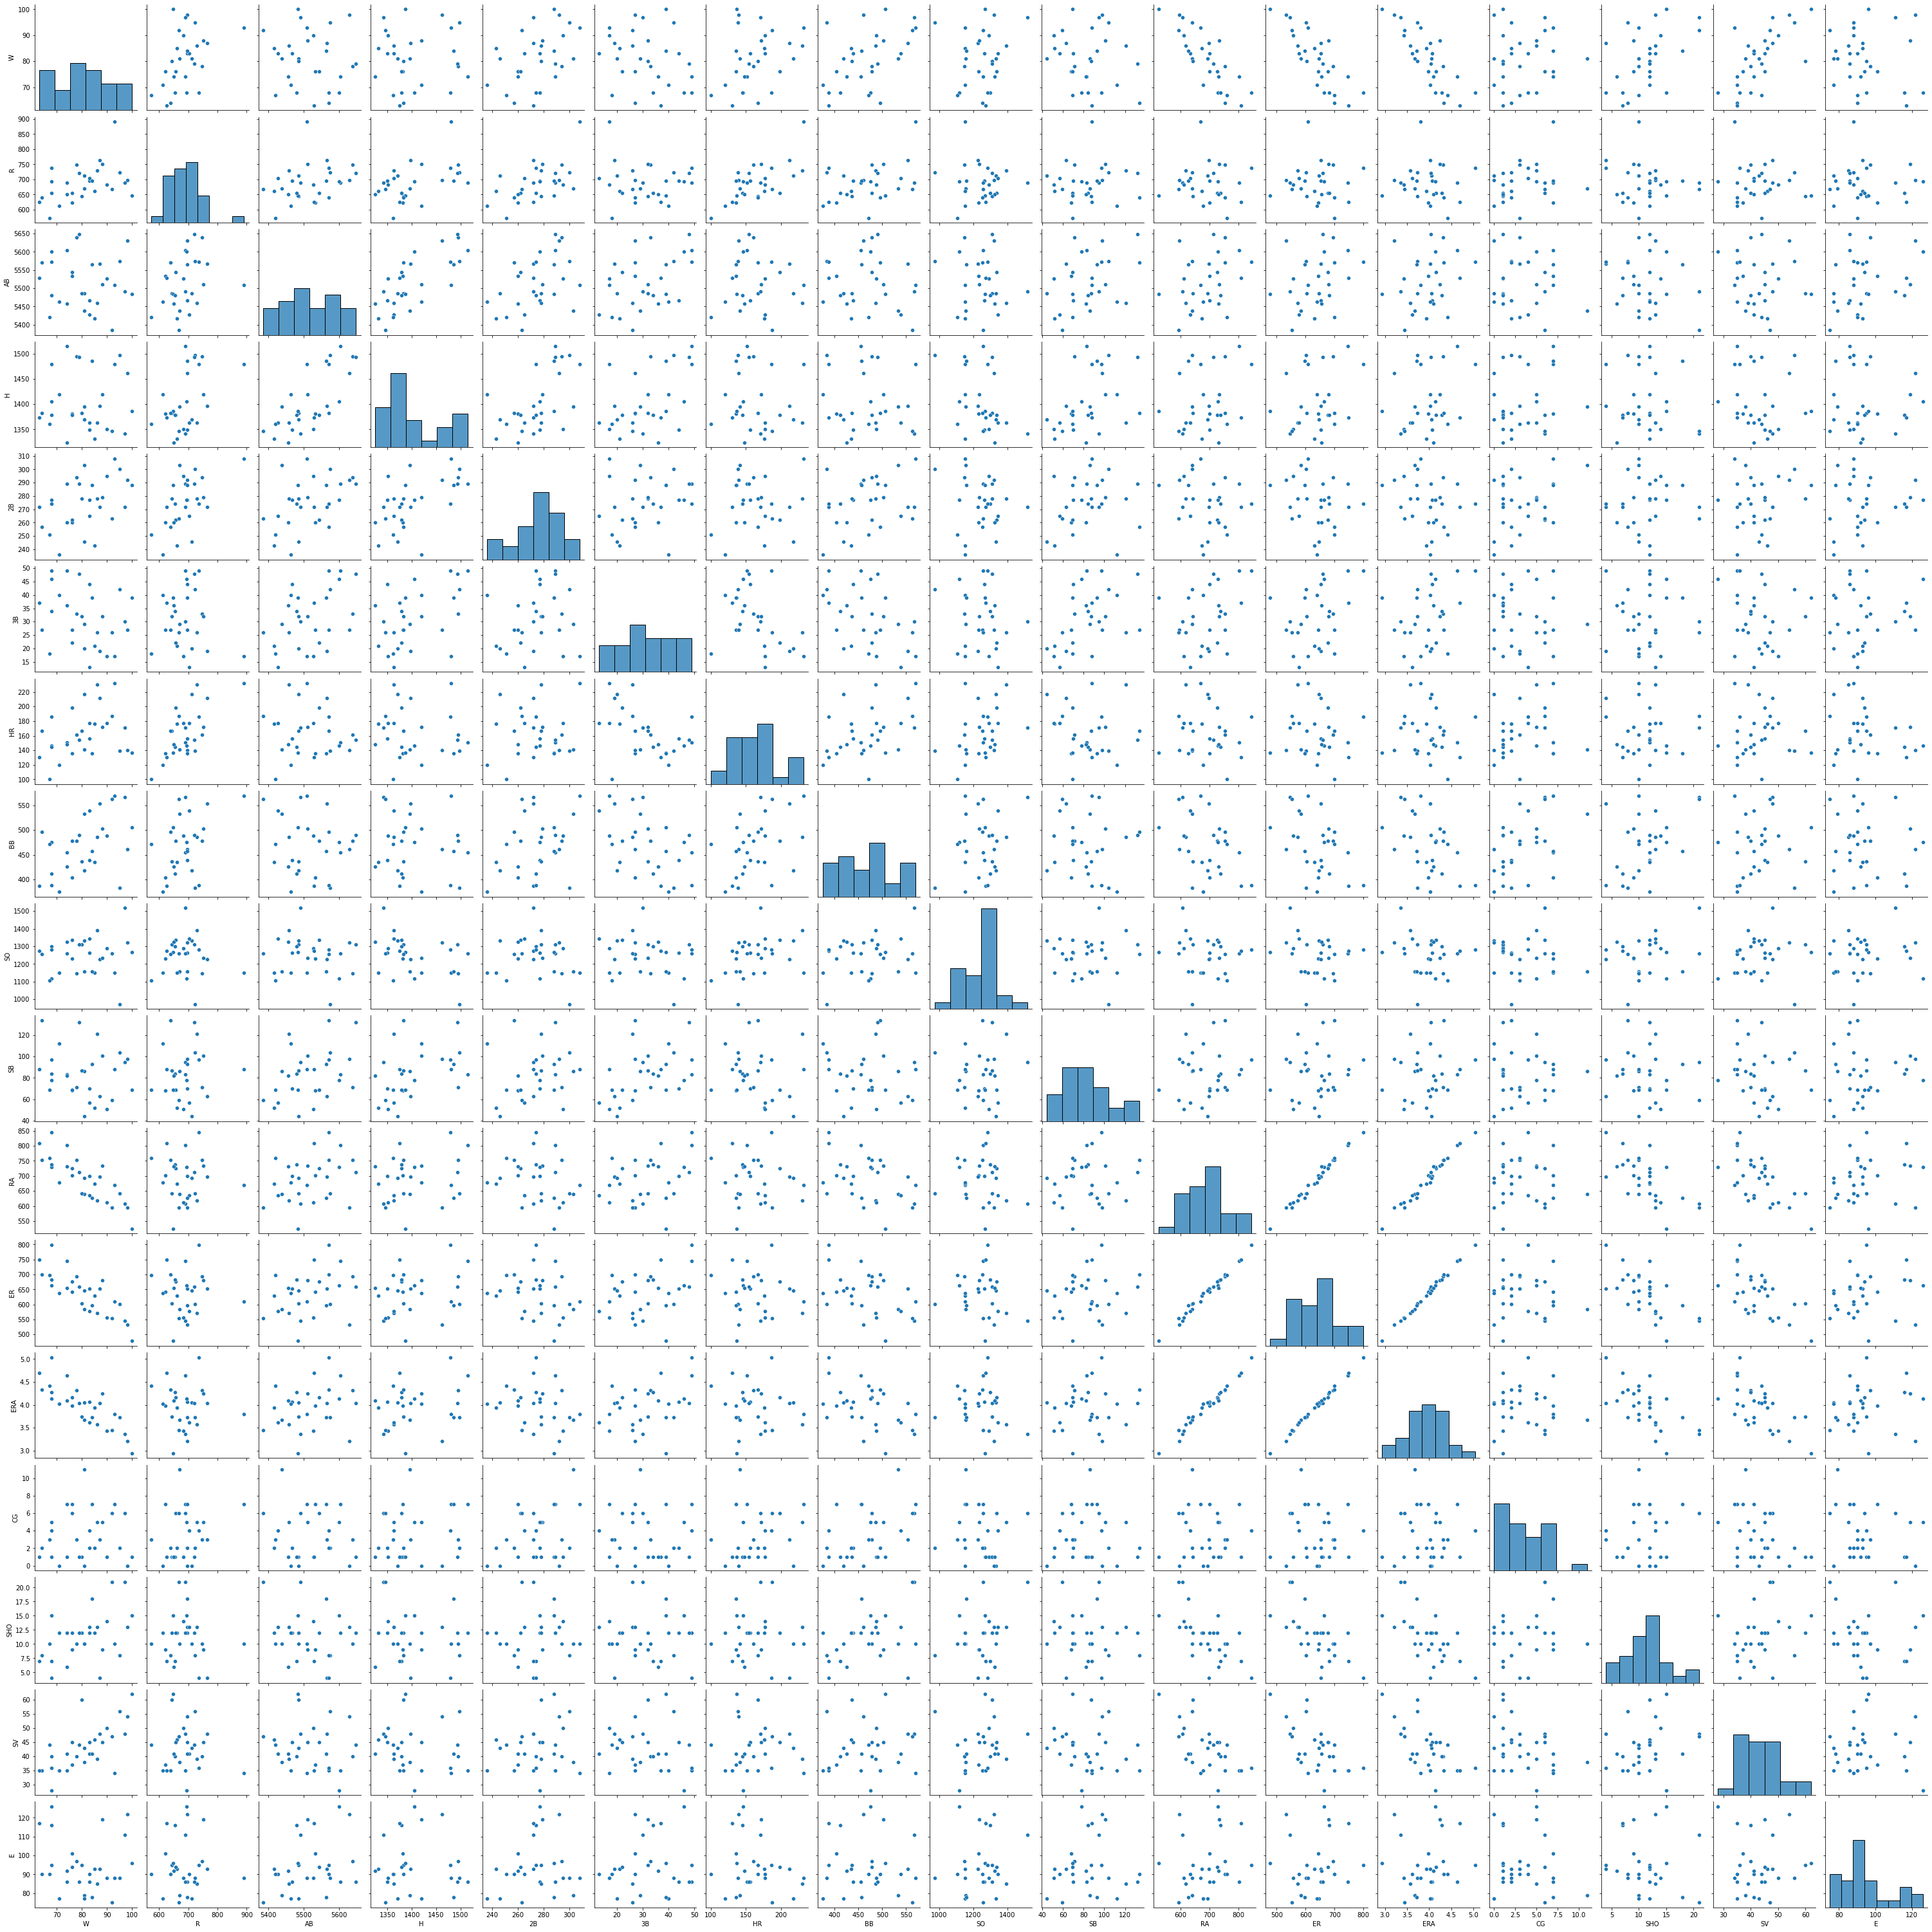

In [90]:
sns.pairplot(df)
plt.savefig('pairplot.png')
plt.show()

In [91]:
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<AxesSubplot:>

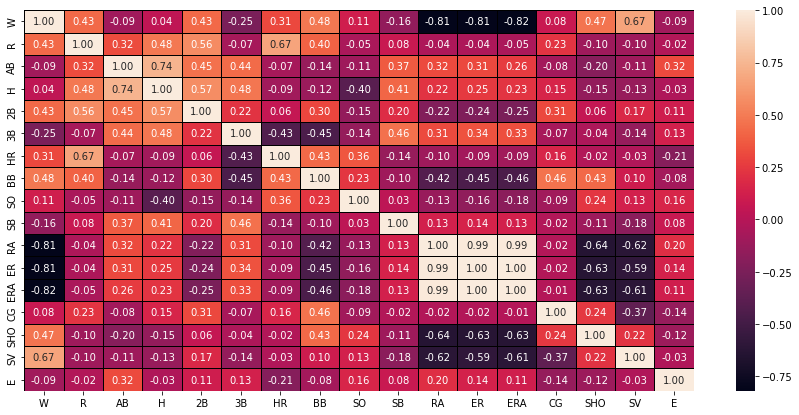

In [92]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, linecolor="black", fmt='.2f')

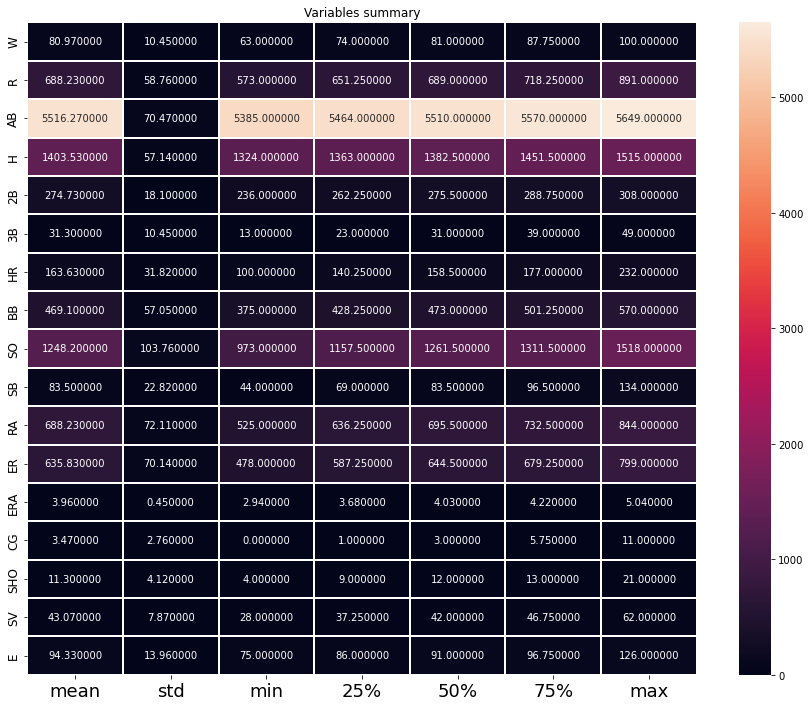

In [93]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.savefig('heatmap.png')
plt.show()

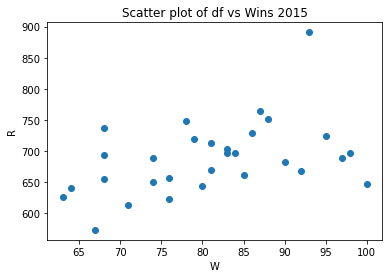

In [94]:
number_of_wins_for_2014 = df['W']
wins_2015 = df['R']

plt.scatter(number_of_wins_for_2014, wins_2015)
plt.title('Scatter plot of df vs Wins 2015')
plt.xlabel('W')
plt.ylabel('R')
plt.show()

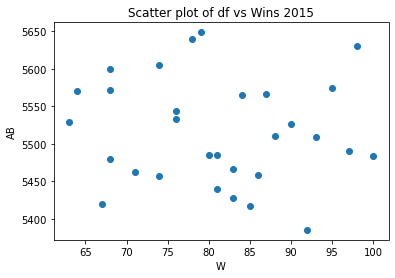

In [95]:
number_of_wins_for_2014 = df['W']
wins_2015 = df['AB']

plt.scatter(number_of_wins_for_2014, wins_2015)
plt.title('Scatter plot of df vs Wins 2015')
plt.xlabel('W')
plt.ylabel('AB')
plt.show()

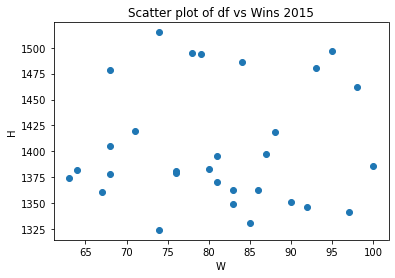

In [96]:
number_of_wins_for_2014 = df['W']
wins_2015 = df['H']

plt.scatter(number_of_wins_for_2014, wins_2015)
plt.title('Scatter plot of df vs Wins 2015')
plt.xlabel('W')
plt.ylabel('H')
plt.show()

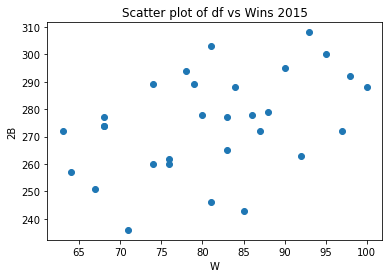

In [97]:
number_of_wins_for_2014 = df['W']
wins_2015 = df['2B']

plt.scatter(number_of_wins_for_2014, wins_2015)
plt.title('Scatter plot of df vs Wins 2015')
plt.xlabel('W')
plt.ylabel('2B')
plt.show()

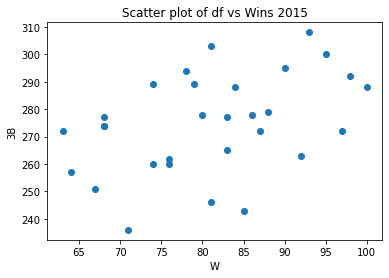

In [98]:
number_of_wins_for_2014 = df['W']
wins_2014 = df['3B']

plt.scatter(number_of_wins_for_2014, wins_2015)
plt.title('Scatter plot of df vs Wins 2015')
plt.xlabel('W')
plt.ylabel('3B')
plt.show()

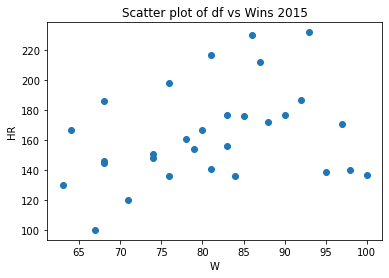

In [99]:
number_of_wins_for_2014 = df['W']
wins_2015 = df['HR']

plt.scatter(number_of_wins_for_2014, wins_2015)
plt.title('Scatter plot of df vs Wins 2015')
plt.xlabel('W')
plt.ylabel('HR')
plt.show()

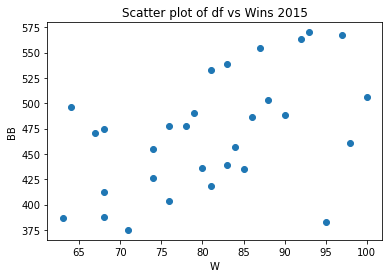

In [100]:
number_of_wins_for_2014 = df['W']
wins_2015 = df['BB']

plt.scatter(number_of_wins_for_2014, wins_2015)
plt.title('Scatter plot of df vs Wins 2015')
plt.xlabel('W')
plt.ylabel('BB')
plt.show()

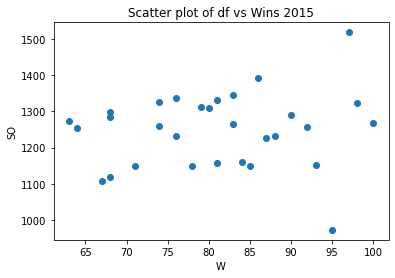

In [101]:
number_of_wins_for_2014 = df['W']
wins_2015 = df['SO']

plt.scatter(number_of_wins_for_2014, wins_2015)
plt.title('Scatter plot of df vs Wins 2015')
plt.xlabel('W')
plt.ylabel('SO')
plt.show()

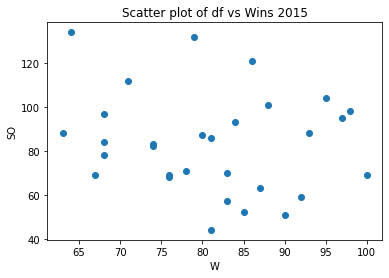

In [102]:
number_of_wins_for_2014 = df['W']
wins_2015 = df['SB']

plt.scatter(number_of_wins_for_2014, wins_2015)
plt.title('Scatter plot of df vs Wins 2015')
plt.xlabel('W')
plt.ylabel('SO')
plt.show()

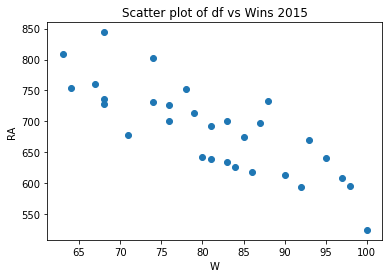

In [103]:
number_of_wins_for_2014 = df['W']
wins_2015 = df['RA']

plt.scatter(number_of_wins_for_2014, wins_2015)
plt.title('Scatter plot of df vs Wins 2015')
plt.xlabel('W')
plt.ylabel('RA')
plt.show()

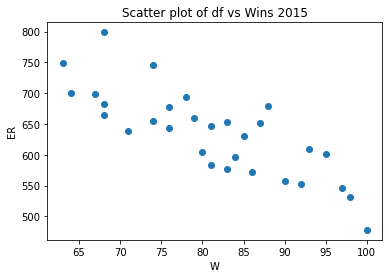

In [104]:
number_of_wins_for_2014 = df['W']
wins_2015 = df['ER']

plt.scatter(number_of_wins_for_2014, wins_2015)
plt.title('Scatter plot of df vs Wins 2015')
plt.xlabel('W')
plt.ylabel('ER')
plt.show()

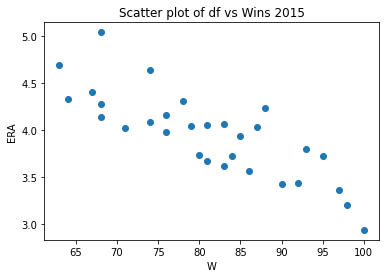

In [105]:
number_of_wins_for_2014 = df['W']
wins_2015 = df['ERA']

plt.scatter(number_of_wins_for_2014, wins_2015)
plt.title('Scatter plot of df vs Wins 2015')
plt.xlabel('W')
plt.ylabel('ERA')
plt.show()

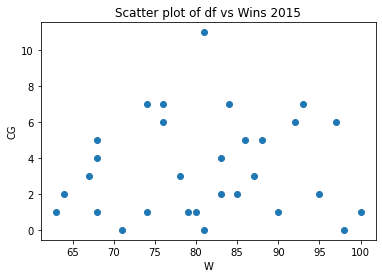

In [106]:
number_of_wins_for_2014 = df['W']
wins_2015 = df['CG']

plt.scatter(number_of_wins_for_2014, wins_2015)
plt.title('Scatter plot of df vs Wins 2015')
plt.xlabel('W')
plt.ylabel('CG')
plt.show()

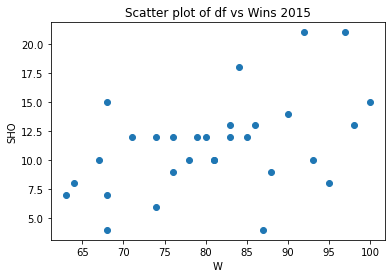

In [107]:
number_of_wins_for_2014 = df['W']
wins_2015 = df['SHO']

plt.scatter(number_of_wins_for_2014, wins_2015)
plt.title('Scatter plot of df vs Wins 2015')
plt.xlabel('W')
plt.ylabel('SHO')
plt.show()

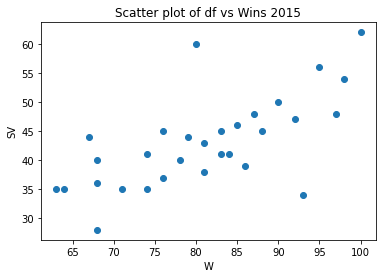

In [108]:
number_of_wins_for_2014 = df['W']
wins_2015 = df['SV']

plt.scatter(number_of_wins_for_2014, wins_2015)
plt.title('Scatter plot of df vs Wins 2015')
plt.xlabel('W')
plt.ylabel('SV')
plt.show()

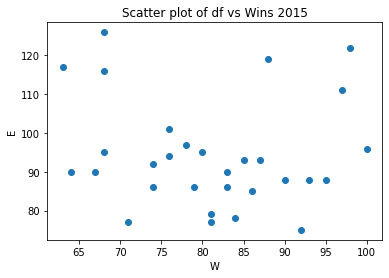

In [109]:
number_of_wins_for_2014 = df['W']
wins_2015 = df['E']

plt.scatter(number_of_wins_for_2014, wins_2015)
plt.title('Scatter plot of df vs Wins 2015')
plt.xlabel('W')
plt.ylabel('E')
plt.show()

In [110]:
new_df=df.drop(['E','SV'],axis=1)
new_df.head()
#new_df.info()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12


In [111]:
from sklearn.model_selection import train_test_split
X=new_df[['R','AB','H','2B','3B','HR','BB','SO','SB','RA','ER','ERA','CG','SHO']]
y=new_df['W']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [112]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

new_df = scale.fit_transform(new_df)

In [113]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train, y_train)

LinearRegression()

In [114]:
coefficient = lm.coef_
coefficient_df = pd.DataFrame(list(zip(X.columns, lm.coef_)), columns=['features', 'coefficients'])
coefficient_df

,features,coefficients
0,R,0.123117
1,AB,-0.028854
2,H,0.019077
3,2B,0.002285
4,3B,-0.127724
5,HR,-0.146872
6,BB,-0.015779
7,SO,0.015940
8,SB,-0.086722
9,RA,-0.424118


In [115]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score

In [116]:
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)

#view transformed values
print(y_transformed)

[20 11 10  6  5 19 15 10  9  7 16 14 13  6  3 23 22 21  3  1 17 11  4  2
  0 18 12  8  5  3]


In [117]:
print  ('Shape                         -------------------->' , df.shape)
print  ('Each Column and data type and its count' , '\n')
print  (df.info())

Shape                         --------------------> (30, 17)
Each Column and data type and its count 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB
None


# PREDICTING THE MODEL

In [118]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [119]:
print(x.shape, x_train.shape, x_test.shape)

(30, 16) (24, 16) (6, 16)


In [120]:
regressor = XGBRegressor()

In [121]:
regressor.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [122]:
df_prediction=regressor.predict(x_train)

In [123]:
r2_wins = metrics.r2_score(y_train, df_prediction)
print('R Squared Value = ', r2_wins)

R Squared Value =  0.9999999982271834


In [124]:
data_prediction = regressor.predict(x_test)

In [125]:
r2_data=metrics.r2_score(y_test,data_prediction)

In [126]:
print('R Squared Value = ', r2_data)

R Squared Value =  0.12319731964550007


In [127]:
input_data = (156, 9.300, 0, 0.016047, 4, 249.8092, 9, 1999,1, 0, 1)
# input_data_reshaped = input_data_as_numpy _array.reshape(1,-1)
# input_data_as_numpy_array = np.asarray(input_data)
#prediction = regressor.predict(input_data_reshaped)
#print(prediction)
#print("The initial value is ",prediction[0])

print("The number of wins for a given team in the dataset of 2014 for the 2015 season is predicted as ", df_prediction[0])

The number of wins for a given team in the dataset of 2014 for the 2015 season is predicted as  67.00037


In [128]:
print("Thus it is the model where we predict number of wins for a given tem in the 2015 season based on several different indicators of success and evaluated successfully.")

Thus it is the model where we predict number of wins for a given tem in the 2015 season based on several different indicators of success and evaluated successfully.


# 

# THANK YOU